<a href="https://colab.research.google.com/github/sc7-cloud/TFG_GOOGLE_COLAB_REPOSITORY/blob/main/ANALISIS_DEL_NEGOCIO_ANALISIS_DE_PREGUNTAS_DE_INVESTIGACI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


from google.colab import files
uploaded = files.upload()


artistas_df = pd.read_excel('/content/Artistas.xlsx')
canciones_df = pd.read_excel('/content/CancionesNuevo.xlsx')


print(artistas_df.head())
print(canciones_df.head())


   Chartmetric ID         Artista  Artista ID            País          Región  \
0         1404155      Lola Young        1001     Reino Unido  Western Europe   
1          470449   Playboi Carti        1002  Estados Unidos   North America   
2            2007            Akon        1003         Senegal  Western Africa   
3            3544  Ellie Goulding        1004     Reino Unido  Western Europe   
4         1202489          GIVĒON        1005  Estados Unidos   North America   

      Continente      Solista/Grupo     Género 1    Género 2   Género 3  ...  \
0         Europe              Grupo          R&B    Folk Pop      Indie  ...   
1  North America  Artistas solistas  Hip-Hop/Rap     Pop Rap   Rage Rap  ...   
2         Africa  Artistas solistas  Hip-Hop/Rap         Pop   R&B/Soul  ...   
3         Europe  Artistas solistas   Electronic  Electropop  Indie Pop  ...   
4  North America  Artistas solistas          R&B         Pop   Neo-Soul  ...   

  Me gusta en TikTok Tasa de Par

In [ ]:

print("Variables y tipos de datos en la base de datos de Artistas:")
print(artistas_df.dtypes)


print("\nVariables y tipos de datos en la base de datos de Canciones:")
print(canciones_df.dtypes)


Variables y tipos de datos en la base de datos de Artistas:
Chartmetric ID                          int64
Artista                                object
Artista ID                              int64
País                                   object
Región                                 object
Continente                             object
Solista/Grupo                          object
Género 1                               object
Género 2                               object
Género 3                               object
Etapa de la carrera                    object
Momentum Reciente                      object
Seguidores en TikTok                    int64
Me gusta en TikTok                      int64
Tasa de Participación en TikTok       float64
Publicaciones de TikTok                 int64
Vistas en TikTok                        int64
Seguidores en Spotify                   int64
Oyentes mensuales en Spotify            int64
Tasa de conversión en Spotify         float64
Alcance de playlists

In [ ]:

artistas_df['Artista ID'] = artistas_df['Artista ID'].astype('category')
artistas_df['Chartmetric ID'] = artistas_df['Chartmetric ID'].astype('category')

canciones_df['Artista ID'] = canciones_df['Artista ID'].astype('category')
canciones_df['Chartmetric ID'] = canciones_df['Chartmetric ID'].astype('category')


print("Tipos de datos en la base de datos de Artistas después de la conversión:")
print(artistas_df.dtypes)

print("\nTipos de datos en la base de datos de Canciones después de la conversión:")
print(canciones_df.dtypes)


Tipos de datos en la base de datos de Artistas después de la conversión:
Chartmetric ID                        category
Artista                                 object
Artista ID                            category
País                                    object
Región                                  object
Continente                              object
Solista/Grupo                           object
Género 1                                object
Género 2                                object
Género 3                                object
Etapa de la carrera                     object
Momentum Reciente                       object
Seguidores en TikTok                     int64
Me gusta en TikTok                       int64
Tasa de Participación en TikTok        float64
Publicaciones de TikTok                  int64
Vistas en TikTok                         int64
Seguidores en Spotify                    int64
Oyentes mensuales en Spotify             int64
Tasa de conversión en Spotify     

                                    Correlación
Alcance de playlists en Spotify             NaN
Conteo de las playlists en Spotify          NaN
Me gusta en TikTok                          NaN
Oyentes mensuales en Spotify                NaN
Publicaciones de TikTok                     NaN
Seguidores en Spotify                       NaN
Seguidores en TikTok                        NaN
Tasa de Participación en TikTok             NaN
Tasa de conversión en Spotify               NaN
Vistas en TikTok                            NaN


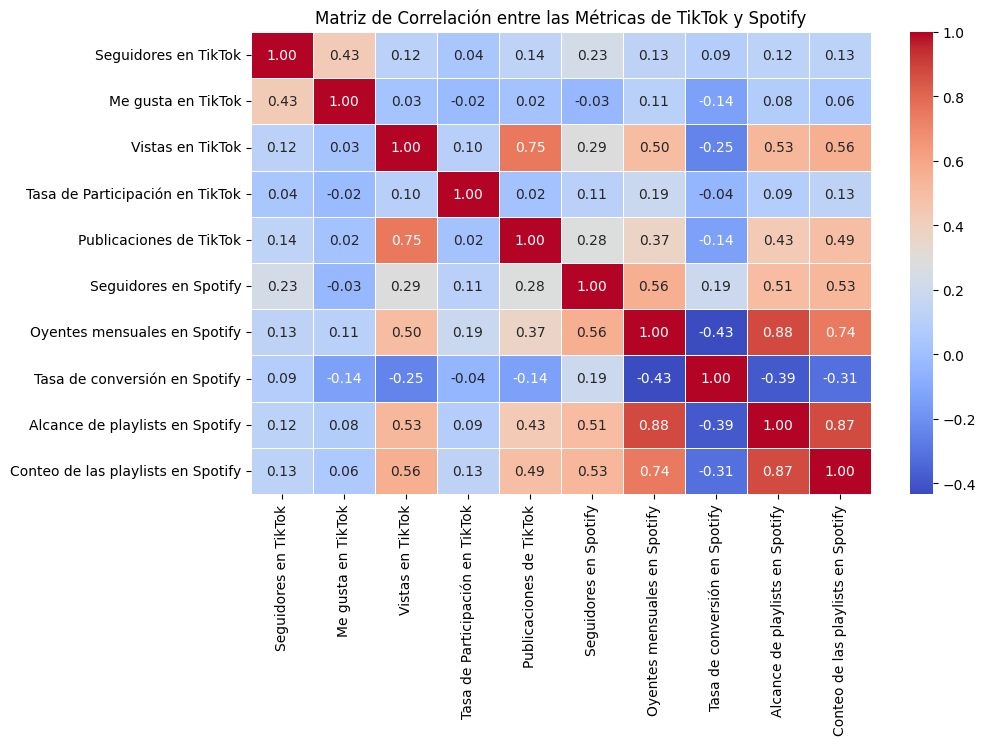

In [ ]:

tiktok_metrics = artistas_df[['Seguidores en TikTok', 'Me gusta en TikTok', 'Vistas en TikTok',
                              'Tasa de Participación en TikTok', 'Publicaciones de TikTok']]

spotify_metrics = artistas_df[['Seguidores en Spotify', 'Oyentes mensuales en Spotify',
                               'Tasa de conversión en Spotify','Alcance de playlists en Spotify', 'Conteo de las playlists en Spotify']]


correlation = tiktok_metrics.corrwith(spotify_metrics).to_frame(name='Correlación')


print(correlation)
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = pd.concat([tiktok_metrics, spotify_metrics], axis=1).corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Métricas de TikTok y Spotify')
plt.show()


Coeficientes: [-1.01192086e-02  2.82309200e-02  1.34242647e-04  6.18355872e+04
 -1.05030328e-01 -5.01392293e+06  7.84919300e-02 -7.02287893e+00
  8.67408056e-01]
Intercepto: 3439833.2459770273
R²: 0.8288705630211772
MAE: 2815934.5171818035
RMSE: 4598506.753835267


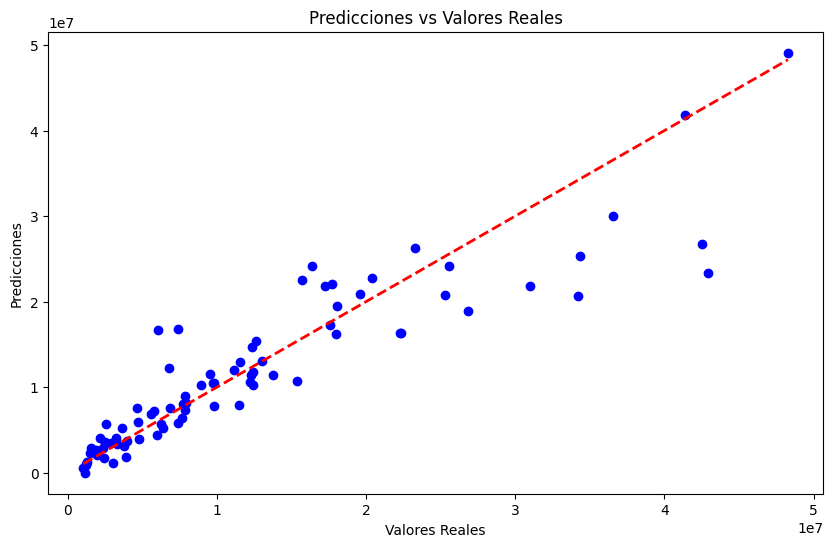

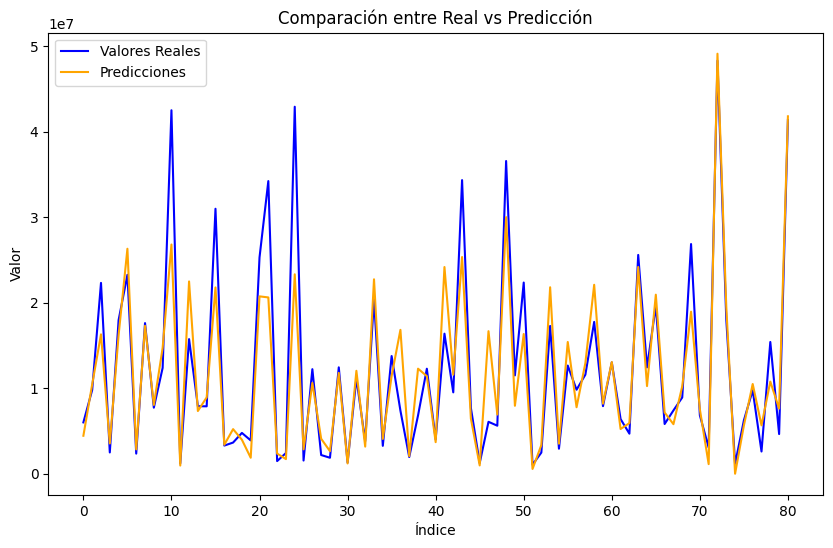

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


X = artistas_df[['Seguidores en TikTok', 'Me gusta en TikTok', 'Vistas en TikTok',
                 'Tasa de Participación en TikTok', 'Publicaciones de TikTok', 'Tasa de conversión en Spotify', 'Alcance de playlists en Spotify', 'Conteo de las playlists en Spotify',
                 'Seguidores en Spotify']]
y = artistas_df['Oyentes mensuales en Spotify']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)


r2 = model.score(X_test, y_test)
print("R²:", r2)


mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reales', color='blue')
plt.plot(y_pred, label='Predicciones', color='orange')
plt.title('Comparación entre Real vs Predicción')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


X = artistas_df[['Seguidores en TikTok', 'Me gusta en TikTok', 'Vistas en TikTok',
                 'Tasa de Participación en TikTok', 'Publicaciones de TikTok']]
y = artistas_df['Oyentes mensuales en Spotify']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

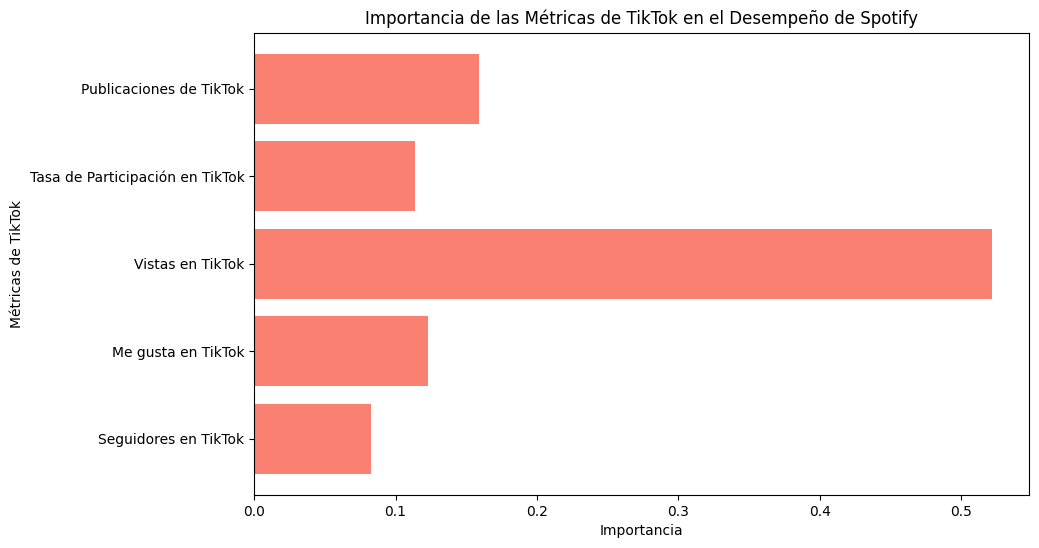

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=500, random_state=42)


rf_model.fit(X_train, y_train)


importances = rf_model.feature_importances_


plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances, color='salmon')
plt.title('Importancia de las Métricas de TikTok en el Desempeño de Spotify')
plt.xlabel('Importancia')
plt.ylabel('Métricas de TikTok')
plt.show()


Outliers encontrados:     Chartmetric ID            Artista Artista ID                  País  \
1           470449      Playboi Carti       1002        Estados Unidos   
8             4517         Young Thug       1009        Estados Unidos   
11            1806           Don Omar       1012           Puerto Rico   
12          717113            Ava Max       1013        Estados Unidos   
13            2143  Pharrell Williams       1014        Estados Unidos   
14            2094             Tiësto       1015          Países Bajos   
15         3626425            Cris Mj       1016                 Chile   
16            1207          Sean Paul       1017               Jamaica   
27          838183        Don Toliver       1028        Estados Unidos   
31         1401297          Pop Smoke       1032        Estados Unidos   
37          181977            El Alfa       1038  República Dominicana   
41             831      Nelly Furtado       1042                Canadá   
42          7319

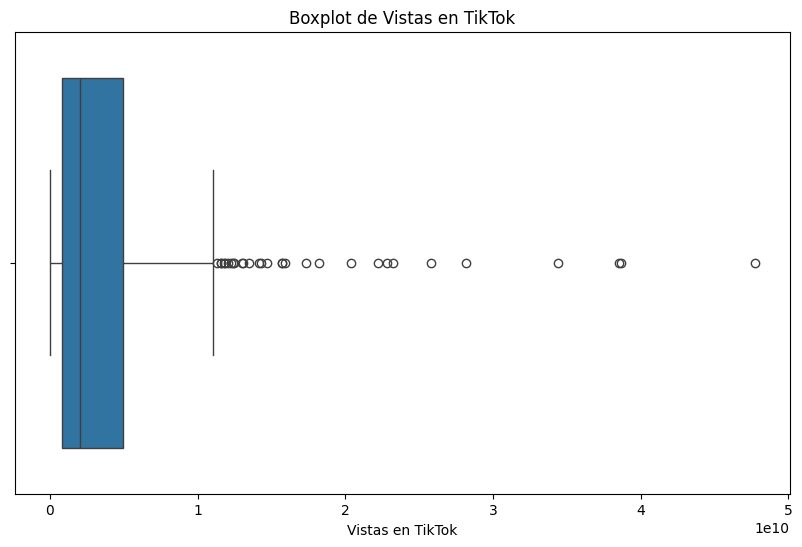

In [ ]:

Q1 = artistas_df['Vistas en TikTok'].quantile(0.25)
Q3 = artistas_df['Vistas en TikTok'].quantile(0.75)
IQR = Q3 - Q1
outliers = artistas_df[(artistas_df['Vistas en TikTok'] < (Q1 - 1.5 * IQR)) |
                       (artistas_df['Vistas en TikTok'] > (Q3 + 1.5 * IQR))]

print("Outliers encontrados:", outliers)


plt.figure(figsize=(10, 6))
sns.boxplot(x=artistas_df['Vistas en TikTok'])
plt.title('Boxplot de Vistas en TikTok')
plt.show()


In [ ]:

numerical_columns = artistas_df.select_dtypes(include='number')


Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1


outliers = (numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))


outliers_df = artistas_df[outliers.any(axis=1)]


outliers_df_clean = outliers_df[['Artista', 'Seguidores en TikTok', 'Oyentes mensuales en Spotify', 'Me gusta en TikTok', 'Vistas en TikTok']].copy()


outliers_df_clean.loc[:, 'Razón de Outlier'] = outliers_df_clean.apply(
    lambda row: 'Posible valor extremo' if row['Seguidores en TikTok'] > Q3['Seguidores en TikTok'] else 'Posible error de entrada', axis=1
)

outliers_df_clean.loc[:, 'Sugerencia'] = outliers_df_clean.apply(
    lambda row: 'Eliminar' if row['Razón de Outlier'] == 'Posible valor extremo' else 'Imputar', axis=1
)


import pandas as pd
from IPython.display import display

display(outliers_df_clean)


,Artista,Seguidores en TikTok,Oyentes mensuales en Spotify,Me gusta en TikTok,Vistas en TikTok,Razón de Outlier,Sugerencia
0,Lola Young,1800000,42896849,24500000,953728995,Posible error de entrada,Imputar
1,Playboi Carti,2200000,52843480,3400000,14140577425,Posible valor extremo,Eliminar
2,Akon,3200000,31490006,16100000,8584715751,Posible valor extremo,Eliminar
3,Ellie Goulding,1600000,41343279,16100000,11022424117,Posible error de entrada,Imputar
4,GIVĒON,4000000,29445103,20200000,10886236261,Posible valor extremo,Eliminar
...,...,...,...,...,...,...,...
375,Ayo & Teo,2700000,1769822,20000000,3117528957,Posible valor extremo,Eliminar
377,CL,1100000,795611,6100000,2034144656,Posible error de entrada,Imputar
383,Yeng Constantino,3200000,1347275,19800000,815292871,Posible valor extremo,Eliminar
385,Lil Xan,1100000,1425938,12000000,215910821,Posible error de entrada,Imputar


In [ ]:

outliers_artists = [
    'Playboi Carti', 'Akon', 'GIVĒON', 'Elton John', 'Tito Double P',
    'GloRilla', 'Don Omar', 'Cris Mj', 'Lil Durk', 'John Legend',
    'Swae Lee', 'Kodak Black', 'Pop Smoke', 'Rick Ross', 'Cazzu',
    'JHAYCO', 'Trippie Redd', 'Roddy Ricch', 'Offset', 'Gwen Stefani',
    'Chance the Rapper', 'Tim McGraw', 'Dadju', 'Hailee Steinfeld', 'Lil Pump',
    'Lunay', 'Me Poze do Rodo', 'CKay', 'Olamide', 'Lefty Sm', 'LIT killah',
    'Kevin Kaal', 'MC Kevin o Chris', 'NIKI', 'Ski Mask The Slump God', 'Rick Astley',
    'Ayo & Teo', 'Trevor Daniel', 'Jaden', 'Bhad Bhabie', 'Tony Effe', 'Tones and I',
    'GOT7', 'Jão', 'GFRIEND', 'Naira Azevedo', 'One OK ROCK', 'Shiva', 'Bhad Bhabie',
    'Yemi Alade', 'cupcakKe', 'Arthur Nery', 'Melim', 'Dadju'
]


outliers_to_remove = artistas_df.loc[artistas_df['Artista'].isin(outliers_artists)]


artistas_df_cleaned = artistas_df.drop(outliers_to_remove.index, axis=0)


import pandas as pd
from IPython.display import display

display(artistas_df_cleaned)


,Chartmetric ID,Artista,Artista ID,País,Región,Continente,Solista/Grupo,Género 1,Género 2,Género 3,...,Me gusta en TikTok,Tasa de Participación en TikTok,Publicaciones de TikTok,Vistas en TikTok,Seguidores en Spotify,Oyentes mensuales en Spotify,Tasa de conversión en Spotify,Alcance de playlists en Spotify,Conteo de las playlists en Spotify,Enlace de Spotify
0,1404155,Lola Young,1001,Reino Unido,Western Europe,Europe,Grupo,R&B,Folk Pop,Indie,...,24500000,14.0039,1791162,953728995,704502,42896849,0.016423,236722098,102843,https://open.spotify.com/artist/67FB4n52MgexGQ...
3,3544,Ellie Goulding,1004,Reino Unido,Western Europe,Europe,Artistas solistas,Electronic,Electropop,Indie Pop,...,16100000,8.2922,5587571,11022424117,12859303,41343279,0.311037,442907117,1120085,https://open.spotify.com/artist/0X2BH1fck6amBI...
6,4732,Hozier,1007,Irlanda,Western Europe,Europe,Artistas solistas,Indie Pop,Irish Singer-Songwriter,Modern Rock,...,22700000,3.2805,825468,4721863588,8422674,50081113,0.168181,454873171,1027231,https://open.spotify.com/artist/2FXC3k01G6Gw61...
8,4517,Young Thug,1009,Estados Unidos,North America,North America,Artistas solistas,Hip-Hop/Rap,Gangsta Rap,Trap,...,8700000,3.4029,48020746,22247147226,11215402,29279334,0.383048,429513688,1676817,https://open.spotify.com/artist/2cvyZnPfNytsdk...
9,728,Black Eyed Peas,1010,Estados Unidos,North America,North America,Grupo,Hip-Hop/Rap,R&B/Soul,Dance Pop,...,4600000,0.7875,6399280,9976429517,8731466,42485870,0.205515,324981926,1357737,https://open.spotify.com/artist/5I6rFDKg9aj6X4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1114575,Fredo Bang,1398,Estados Unidos,North America,North America,Artistas solistas,Hip-Hop/Rap,Drill,Chicago Drill,...,11900000,1.2375,124498,200426022,863195,1302132,0.662909,10013353,123678,https://open.spotify.com/artist/4yTmEo2clwWq2j...
398,3615,Lena,1399,Alemania,Western Europe,Europe,Artistas solistas,Nightcore,Pop,German Pop,...,21200000,6.8164,375963,457153250,772349,1534952,0.503175,11456581,96304,https://open.spotify.com/artist/1p1fwP2j9yYTnr...
399,10366359,Banda Los Sebastianes De Saúl Plata,1400,México,Central America,North America,Grupo,Norteno,Banda,Grupo,...,10700000,0.6743,217289,190819866,1235665,2880583,0.428964,12381853,23738,https://open.spotify.com/artist/2XTrqe2RU5niqO...
400,3076,Our Last Night,1401,Estados Unidos,North America,North America,Grupo,Rock,Metalcore,American Metalcore,...,13800000,1.4823,37138,78718939,1155292,1941117,0.595169,14100927,140304,https://open.spotify.com/artist/00YTqRClk82aMc...


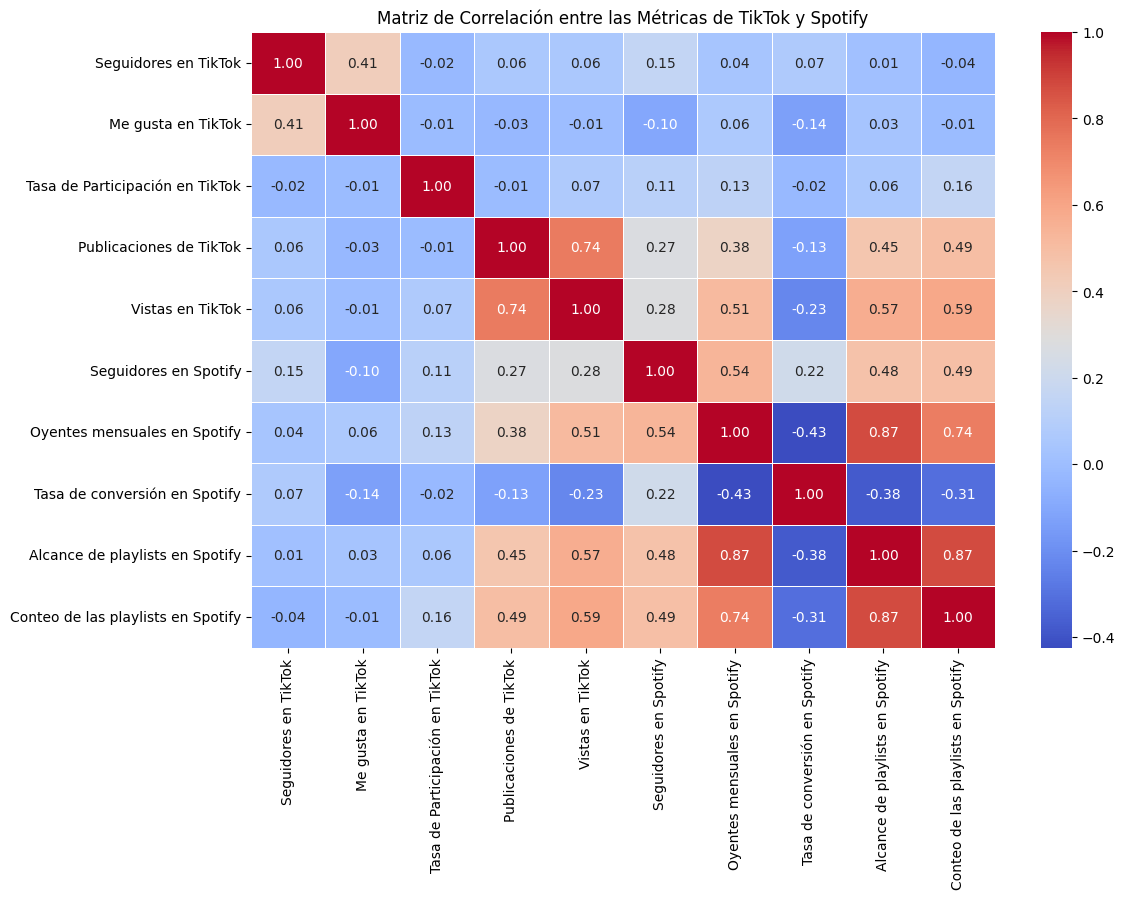

In [ ]:

numerical_columns_cleaned = artistas_df_cleaned.select_dtypes(include='number')


correlation_matrix = numerical_columns_cleaned.corr()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Métricas de TikTok y Spotify')
plt.show()


In [ ]:

print(artistas_df_cleaned.describe())


       Seguidores en TikTok  Me gusta en TikTok  \
count          3.550000e+02        3.550000e+02   
mean           1.680000e+06        1.316113e+07   
std            6.445513e+05        5.689048e+06   
min            1.000000e+06        1.600000e+06   
25%            1.200000e+06        8.700000e+06   
50%            1.500000e+06        1.260000e+07   
75%            1.950000e+06        1.740000e+07   
max            6.700000e+06        2.500000e+07   

       Tasa de Participación en TikTok  Publicaciones de TikTok  \
count                       355.000000             3.550000e+02   
mean                          5.341617             2.555437e+06   
std                           8.492994             4.159978e+06   
min                           0.010100             1.369900e+04   
25%                           0.882650             5.500005e+05   
50%                           2.426700             1.382124e+06   
75%                           5.737700             2.889026e+06   
max 

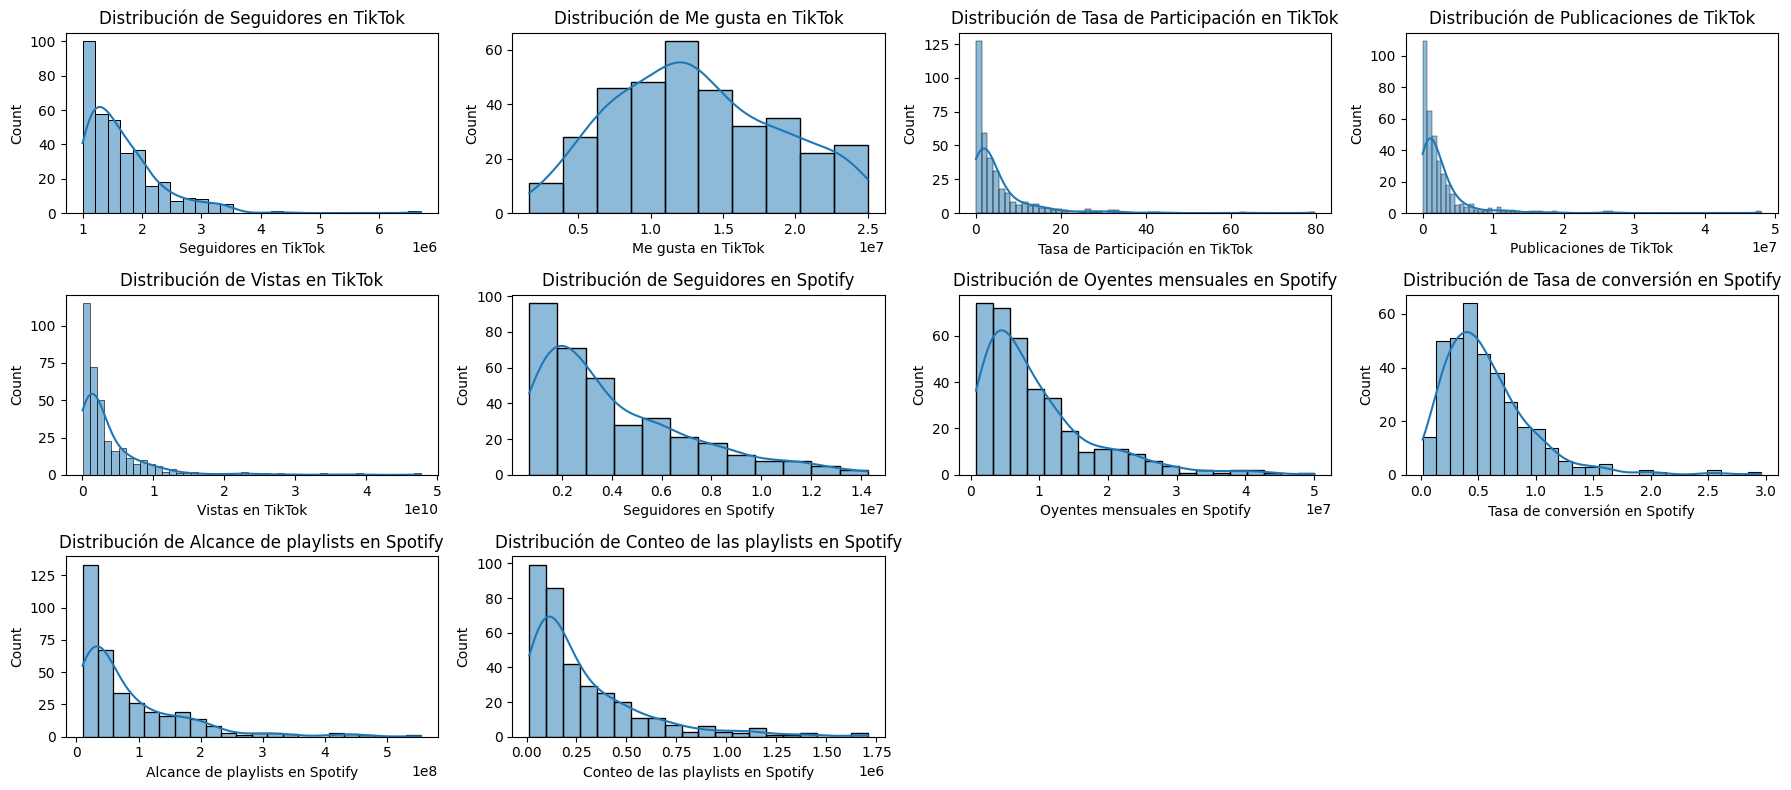

In [ ]:
plt.figure(figsize=(18, 8))
for i, col in enumerate(numerical_columns_cleaned.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(artistas_df_cleaned[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


X = artistas_df_cleaned[['Seguidores en TikTok', 'Me gusta en TikTok', 'Vistas en TikTok',
                 'Tasa de Participación en TikTok', 'Publicaciones de TikTok', 'Tasa de conversión en Spotify', 'Alcance de playlists en Spotify', 'Conteo de las playlists en Spotify',
                 'Seguidores en Spotify']]


y = artistas_df_cleaned['Oyentes mensuales en Spotify']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("R²:", model.score(X_test, y_test))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.853873073861377
MAE: 2329999.630132469
RMSE: 3082675.244040898


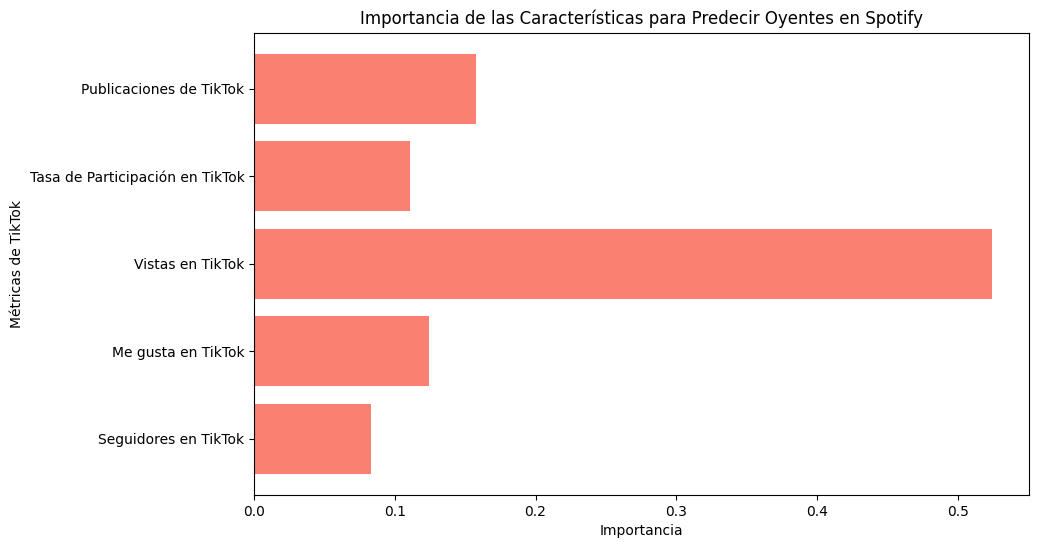

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


feature_importances = rf_model.feature_importances_


plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='salmon')
plt.title('Importancia de las Características para Predecir Oyentes en Spotify')
plt.xlabel('Importancia')
plt.ylabel('Métricas de TikTok')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


X = artistas_df[['Seguidores en TikTok', 'Me gusta en TikTok', 'Vistas en TikTok',
                 'Tasa de Participación en TikTok', 'Publicaciones de TikTok', 'Tasa de conversión en Spotify', 'Alcance de playlists en Spotify', 'Conteo de las playlists en Spotify',
                 'Seguidores en Spotify']]
y = artistas_df['Oyentes mensuales en Spotify']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)


print("R² en el conjunto de entrenamiento:", r2_train)
print("R² en el conjunto de prueba:", r2_test)


print("MAE en entrenamiento:", mean_absolute_error(y_train, y_train_pred))
print("MAE en prueba:", mean_absolute_error(y_test, y_test_pred))

print("RMSE en entrenamiento:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE en prueba:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

R² en el conjunto de entrenamiento: 0.8555899851514801
R² en el conjunto de prueba: 0.8288705630211772
MAE en entrenamiento: 2164784.498446147
MAE en prueba: 2815934.5171818035
RMSE en entrenamiento: 3220139.388168183
RMSE en prueba: 4598506.753835267


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

ridge_model = Ridge(alpha=1.0)


ridge_model.fit(X_train, y_train)


y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)


print("R² en el conjunto de entrenamiento:", ridge_model.score(X_train, y_train))
print("R² en el conjunto de prueba:", ridge_model.score(X_test, y_test))
print("MAE en entrenamiento:", mean_absolute_error(y_train, y_train_pred))
print("MAE en prueba:", mean_absolute_error(y_test, y_test_pred))
print("RMSE en entrenamiento:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE en prueba:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

R² en el conjunto de entrenamiento: 0.8555607850526968
R² en el conjunto de prueba: 0.8286930791523635
MAE en entrenamiento: 2159879.8328462867
MAE en prueba: 2810789.69469302
RMSE en entrenamiento: 3220464.932195065
RMSE en prueba: 4600890.765834698


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.29344e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
from sklearn.linear_model import Lasso


lasso_model = Lasso(alpha=0.1)


lasso_model.fit(X_train, y_train)


y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)


print("R² en el conjunto de entrenamiento:", lasso_model.score(X_train, y_train))
print("R² en el conjunto de prueba:", lasso_model.score(X_test, y_test))
print("MAE en entrenamiento:", mean_absolute_error(y_train, y_train_pred))
print("MAE en prueba:", mean_absolute_error(y_test, y_test_pred))
print("RMSE en entrenamiento:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE en prueba:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

R² en el conjunto de entrenamiento: 0.8555899851514789
R² en el conjunto de prueba: 0.8288705618190383
MAE en entrenamiento: 2164784.4654161045
MAE en prueba: 2815934.483704204
RMSE en entrenamiento: 3220139.388168197
RMSE en prueba: 4598506.769986914


In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


print("R² en el conjunto de entrenamiento:", rf_model.score(X_train, y_train))
print("R² en el conjunto de prueba:", rf_model.score(X_test, y_test))
print("MAE en entrenamiento:", mean_absolute_error(y_train, y_train_pred))
print("MAE en prueba:", mean_absolute_error(y_test, y_test_pred))
print("RMSE en entrenamiento:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE en prueba:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


R² en el conjunto de entrenamiento: 0.9760631034293834
R² en el conjunto de prueba: 0.8651184231349293
MAE en entrenamiento: 763693.4073520249
MAE en prueba: 2465341.529876543
RMSE en entrenamiento: 1311021.8698269685
RMSE en prueba: 4082543.1642915523


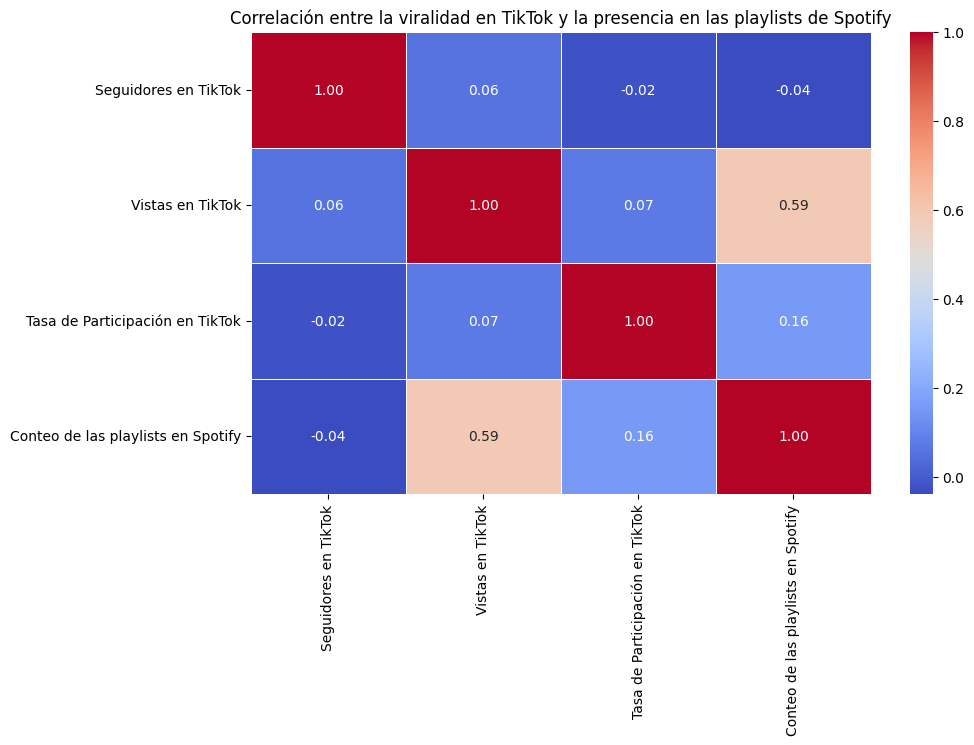

In [ ]:




correlation_data = artistas_df_cleaned[['Seguidores en TikTok', 'Vistas en TikTok', 'Tasa de Participación en TikTok', 'Conteo de las playlists en Spotify']]


correlation_matrix = correlation_data.corr()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre la viralidad en TikTok y la presencia en las playlists de Spotify')
plt.show()


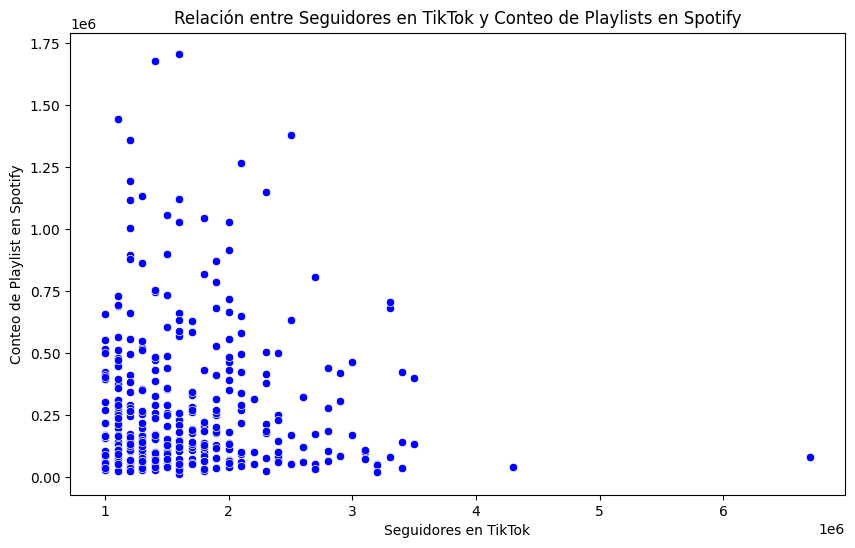

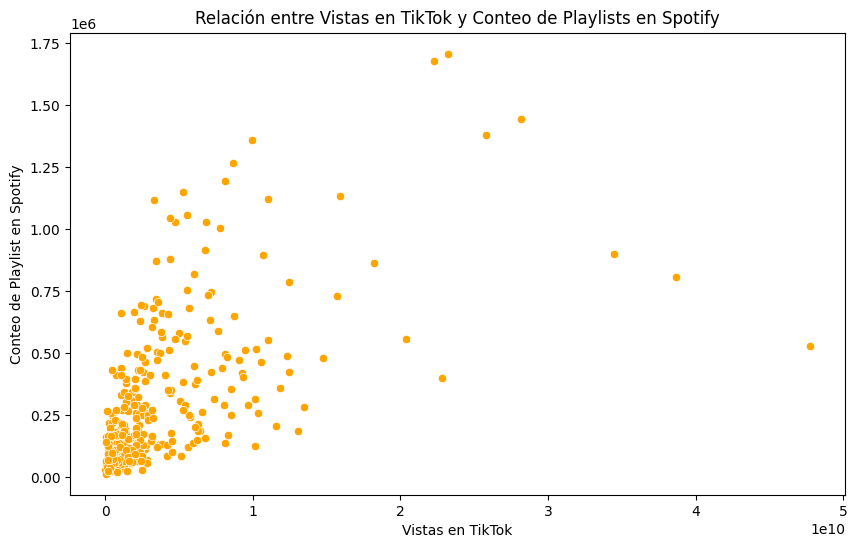

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=artistas_df_cleaned['Seguidores en TikTok'], y=artistas_df_cleaned['Conteo de las playlists en Spotify'], color='blue')
plt.title('Relación entre Seguidores en TikTok y Conteo de Playlists en Spotify')
plt.xlabel('Seguidores en TikTok')
plt.ylabel('Conteo de Playlist en Spotify')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=artistas_df_cleaned['Vistas en TikTok'], y=artistas_df_cleaned['Conteo de las playlists en Spotify'], color='orange')
plt.title('Relación entre Vistas en TikTok y Conteo de Playlists en Spotify')
plt.xlabel('Vistas en TikTok')
plt.ylabel('Conteo de Playlist en Spotify')
plt.show()


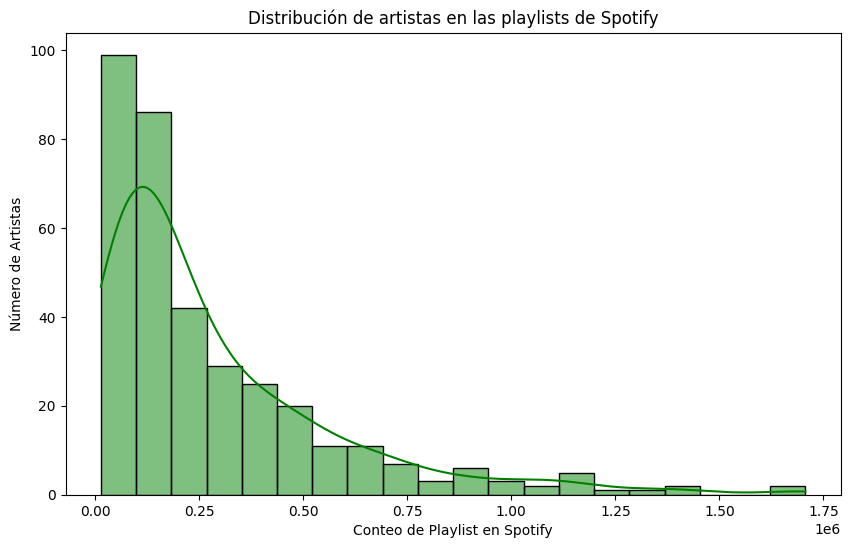

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(artistas_df_cleaned['Conteo de las playlists en Spotify'], kde=True, color='green')
plt.title('Distribución de artistas en las playlists de Spotify')
plt.xlabel('Conteo de Playlist en Spotify')
plt.ylabel('Número de Artistas')
plt.show()


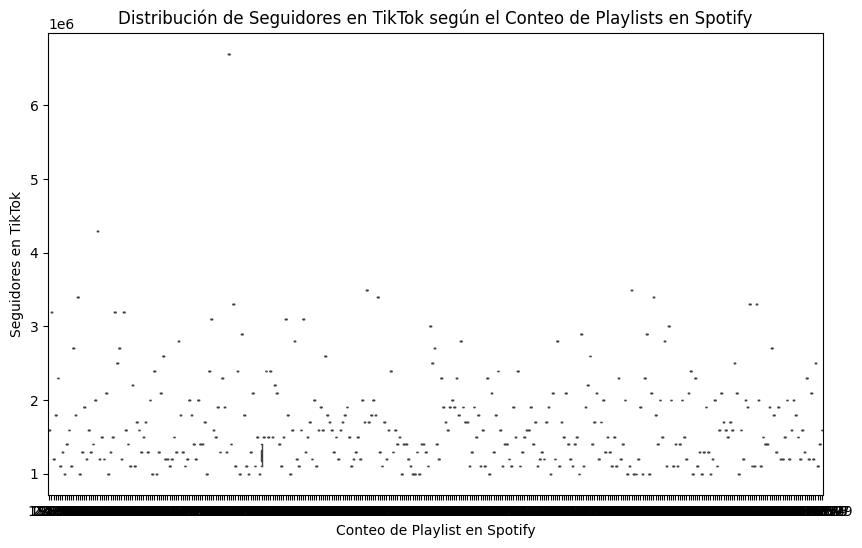

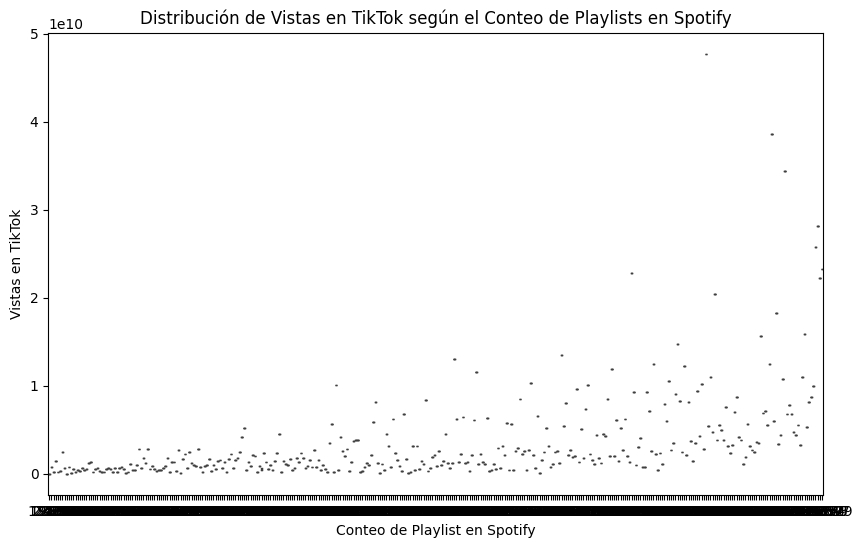

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Conteo de las playlists en Spotify', y='Seguidores en TikTok', data=artistas_df_cleaned)
plt.title('Distribución de Seguidores en TikTok según el Conteo de Playlists en Spotify')
plt.xlabel('Conteo de Playlist en Spotify')
plt.ylabel('Seguidores en TikTok')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Conteo de las playlists en Spotify', y='Vistas en TikTok', data=artistas_df_cleaned)
plt.title('Distribución de Vistas en TikTok según el Conteo de Playlists en Spotify')
plt.xlabel('Conteo de Playlist en Spotify')
plt.ylabel('Vistas en TikTok')
plt.show()


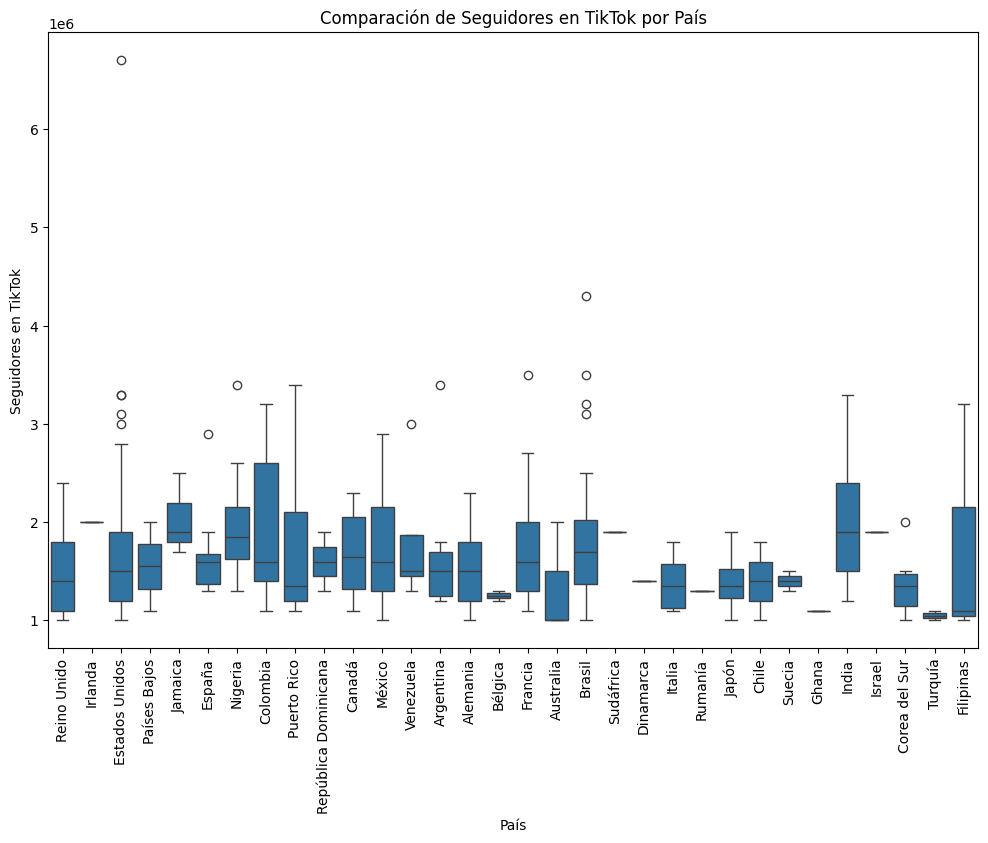

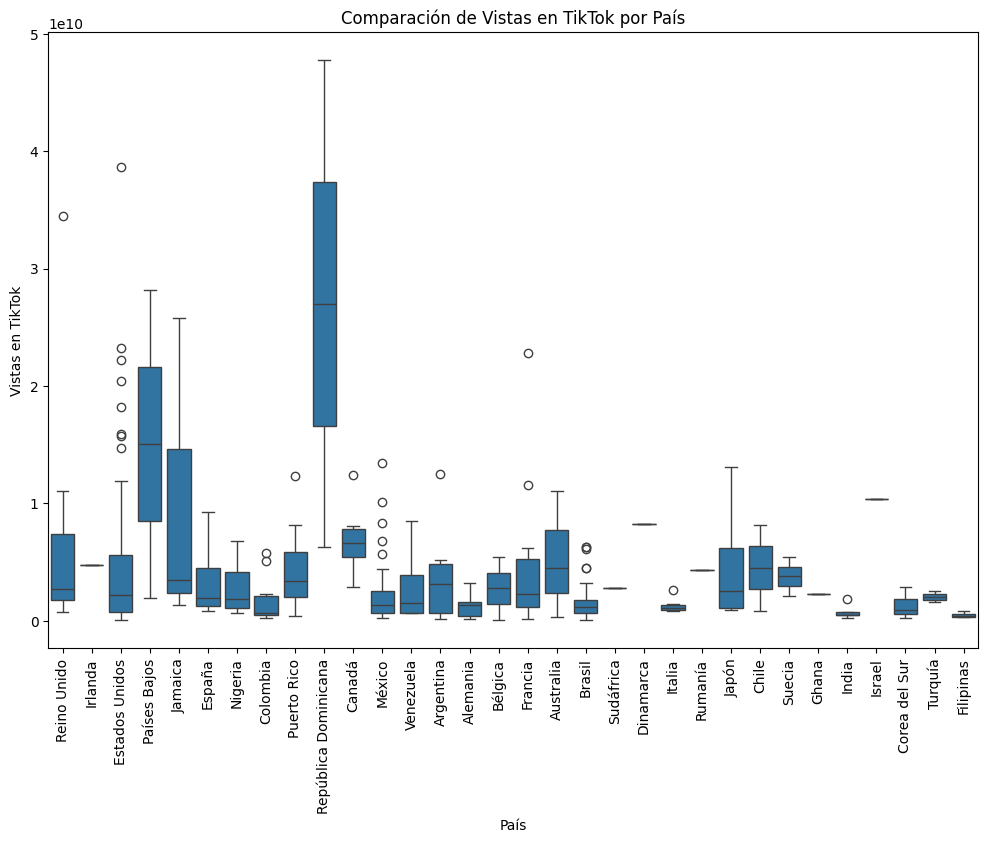

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='País', y='Seguidores en TikTok', data=artistas_df_cleaned)
plt.title('Comparación de Seguidores en TikTok por País')
plt.xlabel('País')
plt.ylabel('Seguidores en TikTok')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x='País', y='Vistas en TikTok', data=artistas_df_cleaned)
plt.title('Comparación de Vistas en TikTok por País')
plt.xlabel('País')
plt.ylabel('Vistas en TikTok')
plt.xticks(rotation=90)
plt.show()


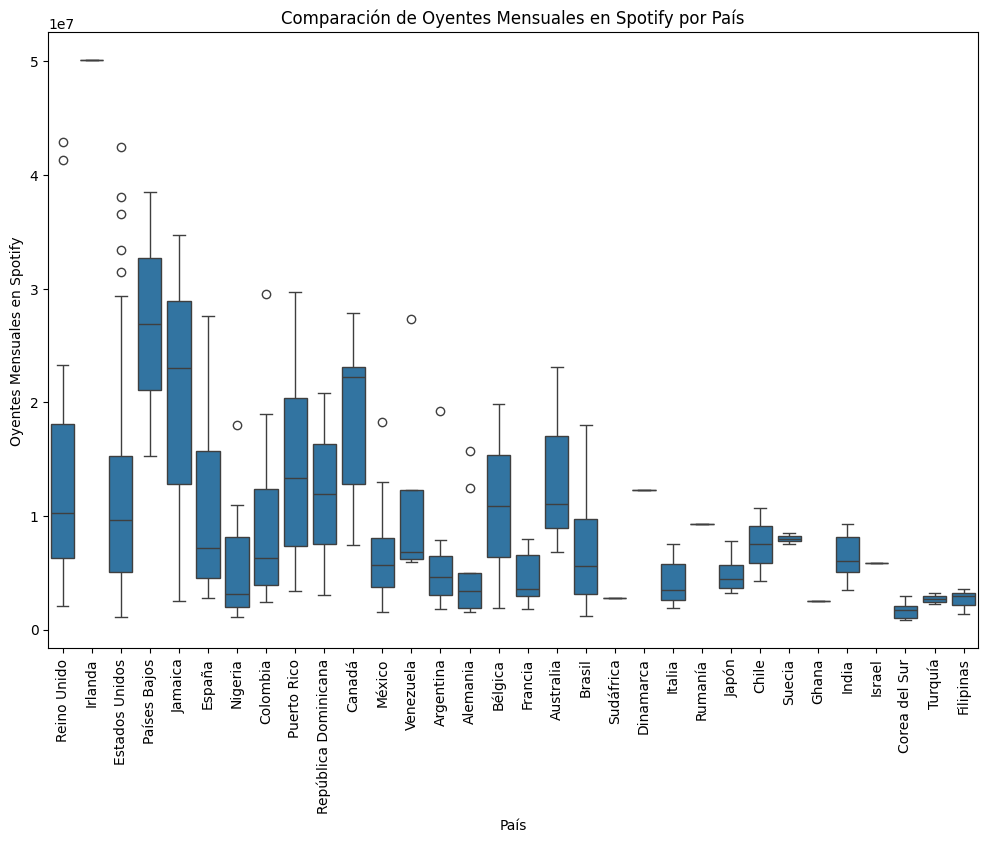

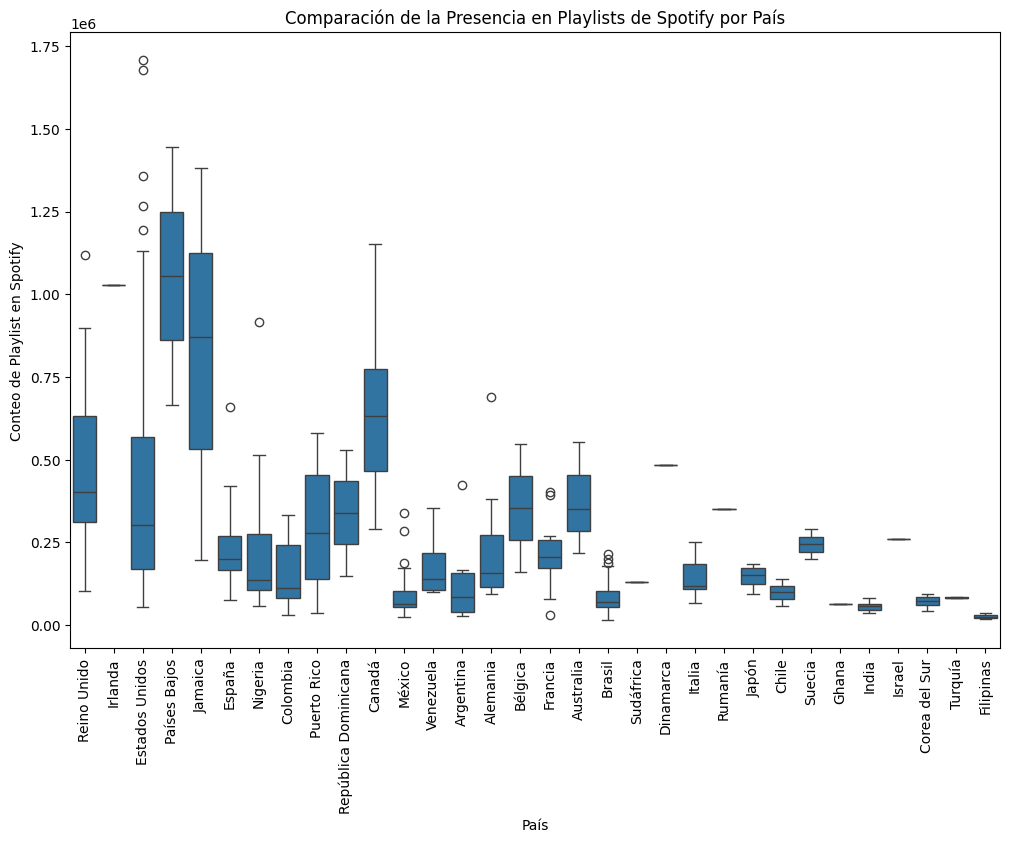

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='País', y='Oyentes mensuales en Spotify', data=artistas_df_cleaned)
plt.title('Comparación de Oyentes Mensuales en Spotify por País')
plt.xlabel('País')
plt.ylabel('Oyentes Mensuales en Spotify')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x='País', y='Conteo de las playlists en Spotify', data=artistas_df_cleaned)
plt.title('Comparación de la Presencia en Playlists de Spotify por País')
plt.xlabel('País')
plt.ylabel('Conteo de Playlist en Spotify')
plt.xticks(rotation=90)
plt.show()


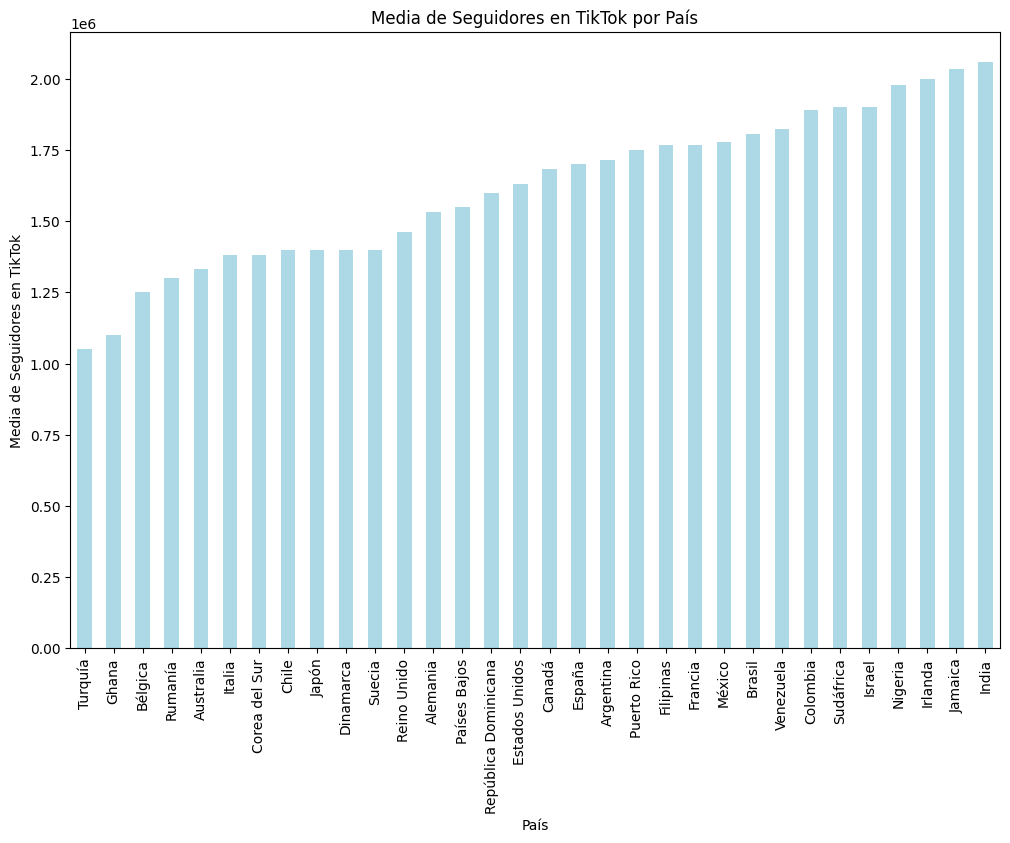

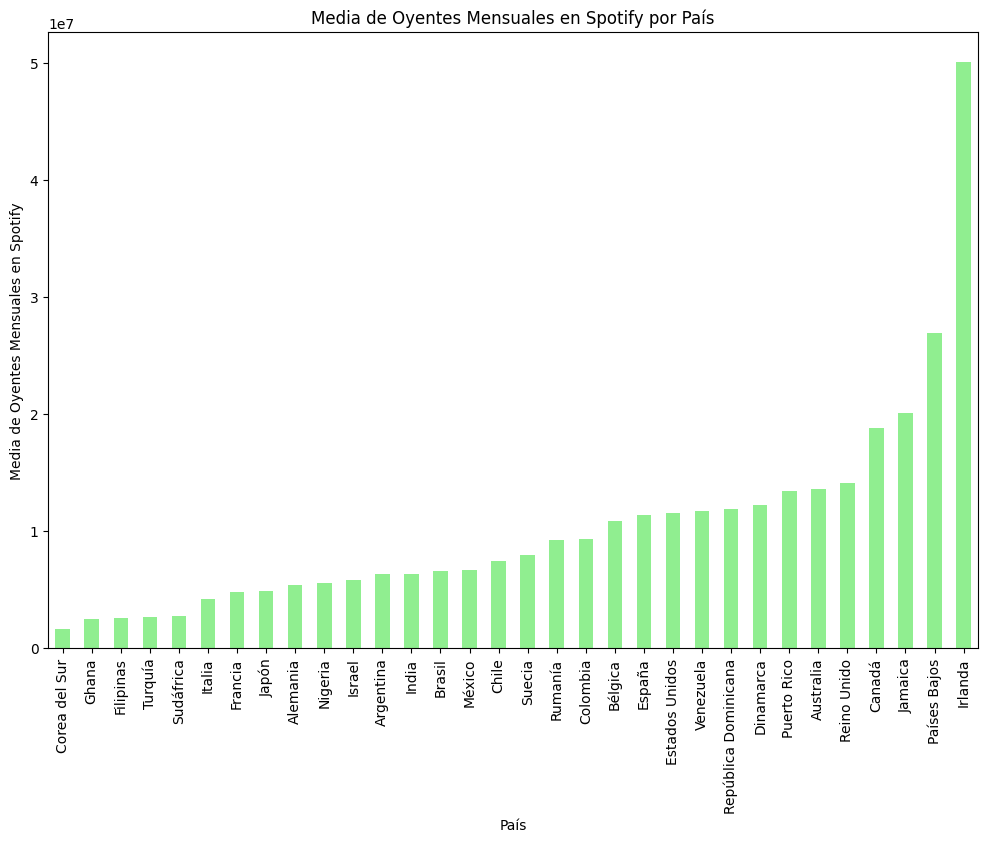

In [ ]:

country_tiktok = artistas_df_cleaned.groupby('País')['Seguidores en TikTok'].mean().sort_values()


plt.figure(figsize=(12, 8))
country_tiktok.plot(kind='bar', color='lightblue')
plt.title('Media de Seguidores en TikTok por País')
plt.xlabel('País')
plt.ylabel('Media de Seguidores en TikTok')
plt.xticks(rotation=90)
plt.show()


country_spotify = artistas_df_cleaned.groupby('País')['Oyentes mensuales en Spotify'].mean().sort_values()


plt.figure(figsize=(12, 8))
country_spotify.plot(kind='bar', color='lightgreen')
plt.title('Media de Oyentes Mensuales en Spotify por País')
plt.xlabel('País')
plt.ylabel('Media de Oyentes Mensuales en Spotify')
plt.xticks(rotation=90)
plt.show()


In [ ]:

mean_tiktok_followers = artistas_df_cleaned['Seguidores en TikTok'].mean()


artistas_df_cleaned['Clasificación'] = artistas_df_cleaned['Seguidores en TikTok'].apply(
    lambda x: 'Crecimiento Explosivo' if x > mean_tiktok_followers else 'Crecimiento Consolidado'
)


print(artistas_df_cleaned[['Artista', 'Seguidores en TikTok', 'Clasificación']].head())



           Artista  Seguidores en TikTok            Clasificación
0       Lola Young               1800000    Crecimiento Explosivo
3   Ellie Goulding               1600000  Crecimiento Consolidado
6           Hozier               2000000    Crecimiento Explosivo
8       Young Thug               1400000  Crecimiento Consolidado
9  Black Eyed Peas               1200000  Crecimiento Consolidado


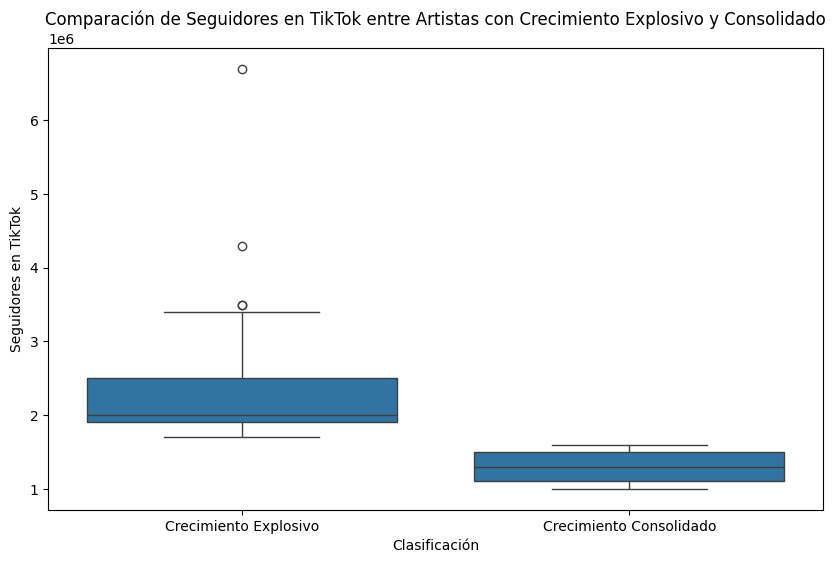

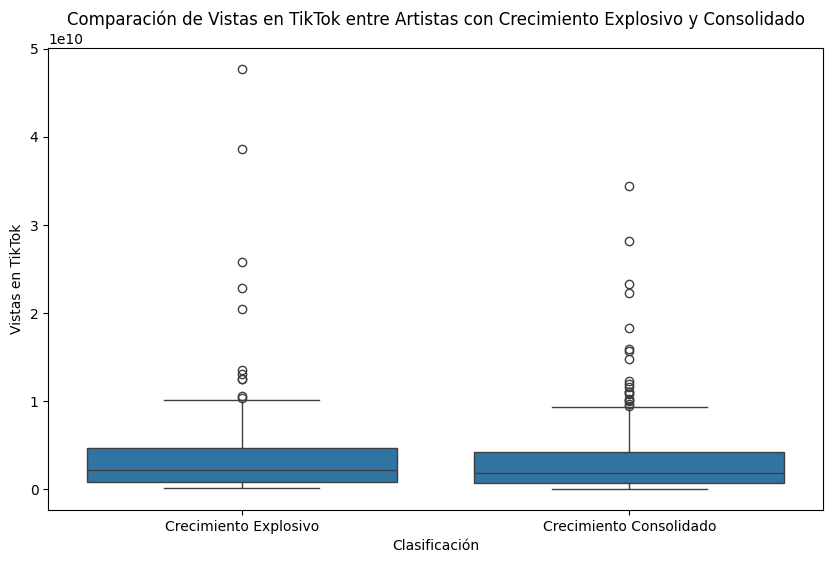

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Clasificación', y='Seguidores en TikTok', data=artistas_df_cleaned)
plt.title('Comparación de Seguidores en TikTok entre Artistas con Crecimiento Explosivo y Consolidado')
plt.xlabel('Clasificación')
plt.ylabel('Seguidores en TikTok')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Clasificación', y='Vistas en TikTok', data=artistas_df_cleaned)
plt.title('Comparación de Vistas en TikTok entre Artistas con Crecimiento Explosivo y Consolidado')
plt.xlabel('Clasificación')
plt.ylabel('Vistas en TikTok')
plt.show()


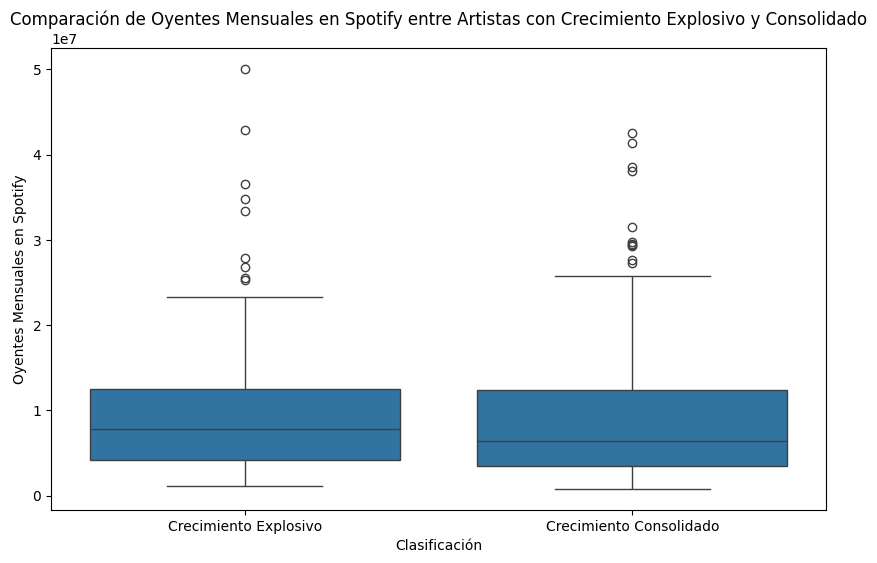

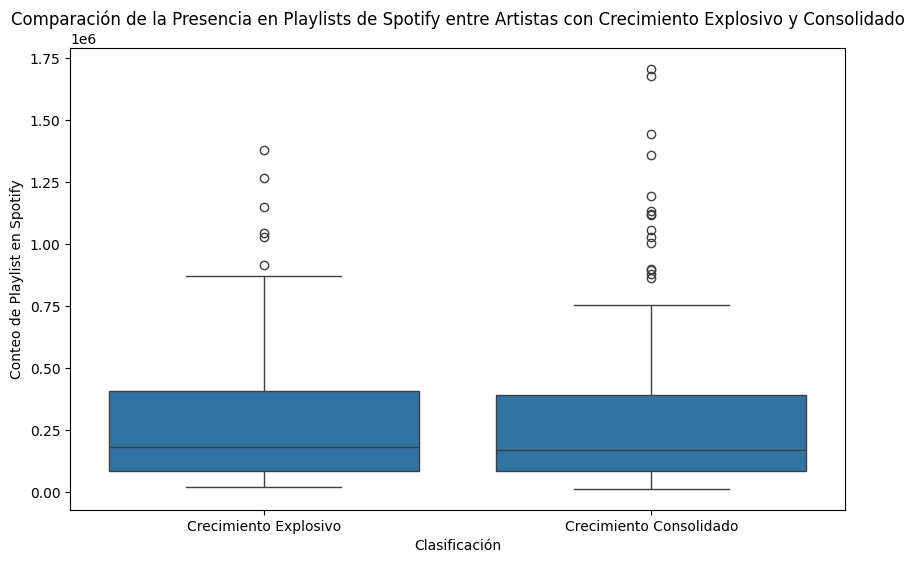

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Clasificación', y='Oyentes mensuales en Spotify', data=artistas_df_cleaned)
plt.title('Comparación de Oyentes Mensuales en Spotify entre Artistas con Crecimiento Explosivo y Consolidado')
plt.xlabel('Clasificación')
plt.ylabel('Oyentes Mensuales en Spotify')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='Clasificación', y='Conteo de las playlists en Spotify', data=artistas_df_cleaned)
plt.title('Comparación de la Presencia en Playlists de Spotify entre Artistas con Crecimiento Explosivo y Consolidado')
plt.xlabel('Clasificación')
plt.ylabel('Conteo de Playlist en Spotify')
plt.show()


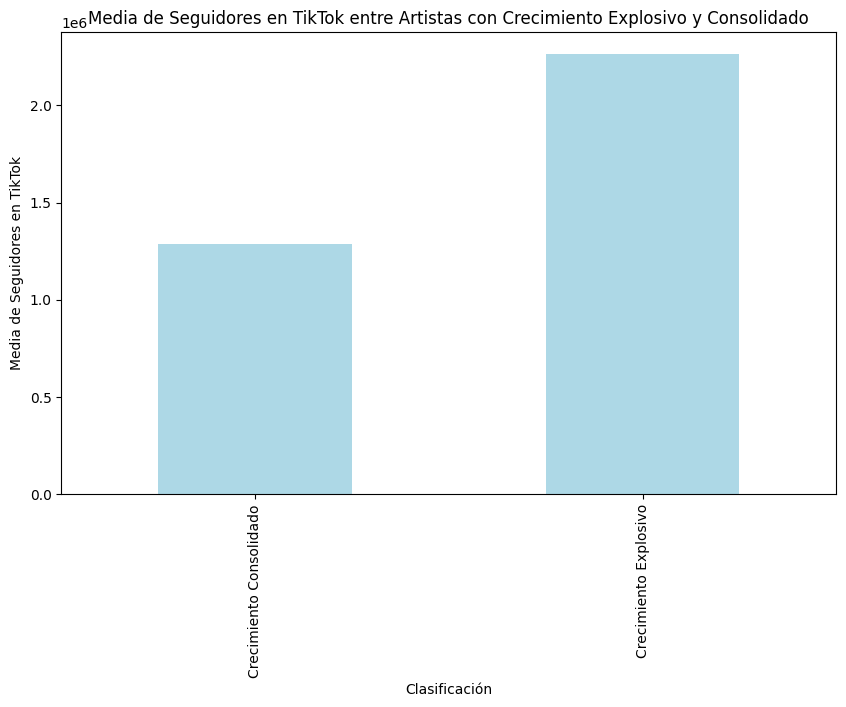

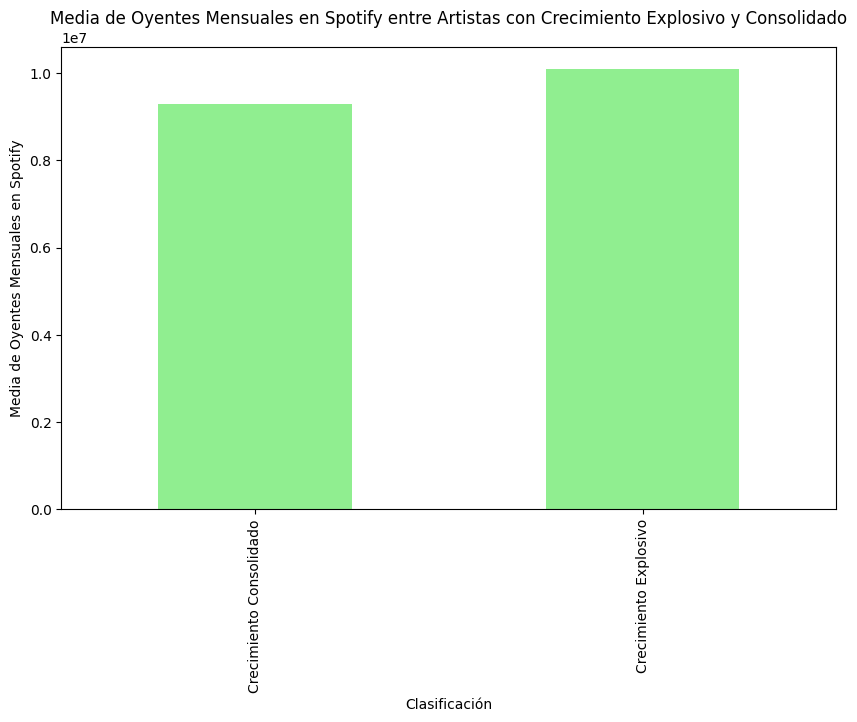

In [ ]:

mean_tiktok_by_class = artistas_df_cleaned.groupby('Clasificación')['Seguidores en TikTok'].mean()


plt.figure(figsize=(10, 6))
mean_tiktok_by_class.plot(kind='bar', color='lightblue')
plt.title('Media de Seguidores en TikTok entre Artistas con Crecimiento Explosivo y Consolidado')
plt.xlabel('Clasificación')
plt.ylabel('Media de Seguidores en TikTok')
plt.show()


mean_spotify_by_class = artistas_df_cleaned.groupby('Clasificación')['Oyentes mensuales en Spotify'].mean()


plt.figure(figsize=(10, 6))
mean_spotify_by_class.plot(kind='bar', color='lightgreen')
plt.title('Media de Oyentes Mensuales en Spotify entre Artistas con Crecimiento Explosivo y Consolidado')
plt.xlabel('Clasificación')
plt.ylabel('Media de Oyentes Mensuales en Spotify')
plt.show()


                   Seguidores en TikTok  Vistas en TikTok  \
Género 1                                                    
Afrobeats                  1.936364e+06      2.473297e+09   
Amapiano                   1.900000e+06      2.790173e+09   
Argentine Hip-Hop          3.400000e+06      1.248417e+10   
Bachata                    1.942857e+06      3.813280e+09   
Bollywood                  2.400000e+06      4.515564e+08   
...                                 ...               ...   
Trap Latino                1.100000e+06      1.148494e+09   
Turkish Hip-Hop            1.050000e+06      2.024682e+09   
UK Drill                   1.000000e+06      9.353171e+09   
UK Hip-Hop                 1.400000e+06      5.389145e+09   
Vocal                      1.800000e+06      1.100450e+09   

                   Tasa de Participación en TikTok  
Género 1                                            
Afrobeats                                 9.401273  
Amapiano                                  2.164

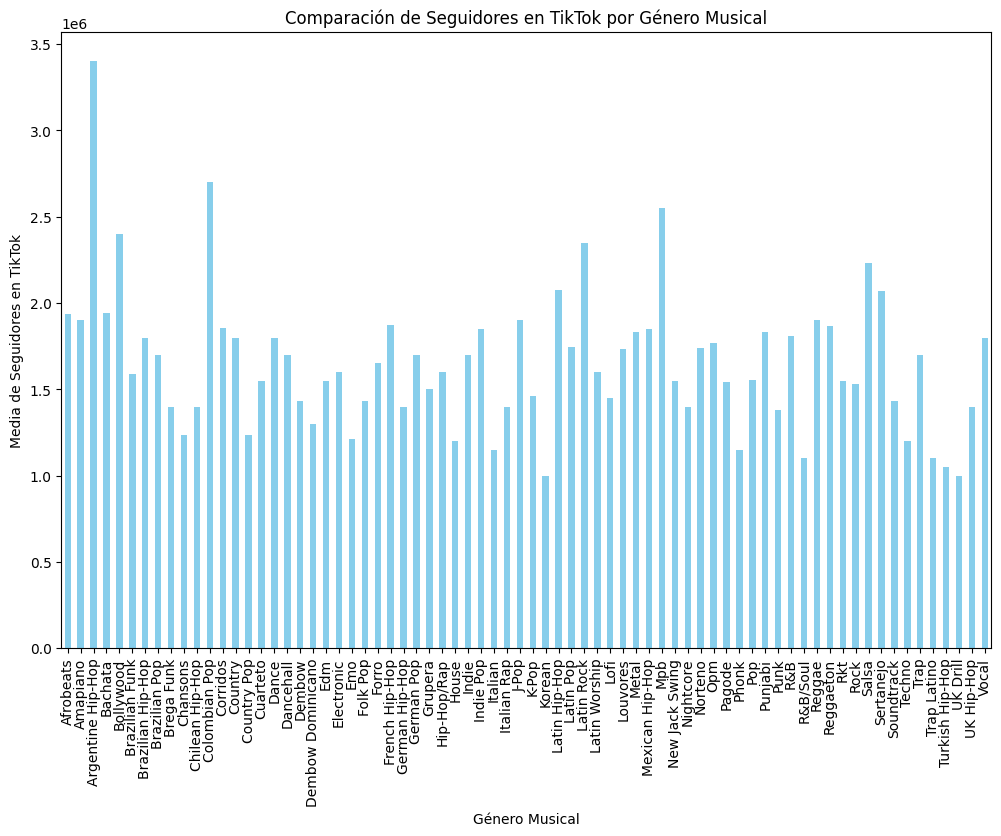

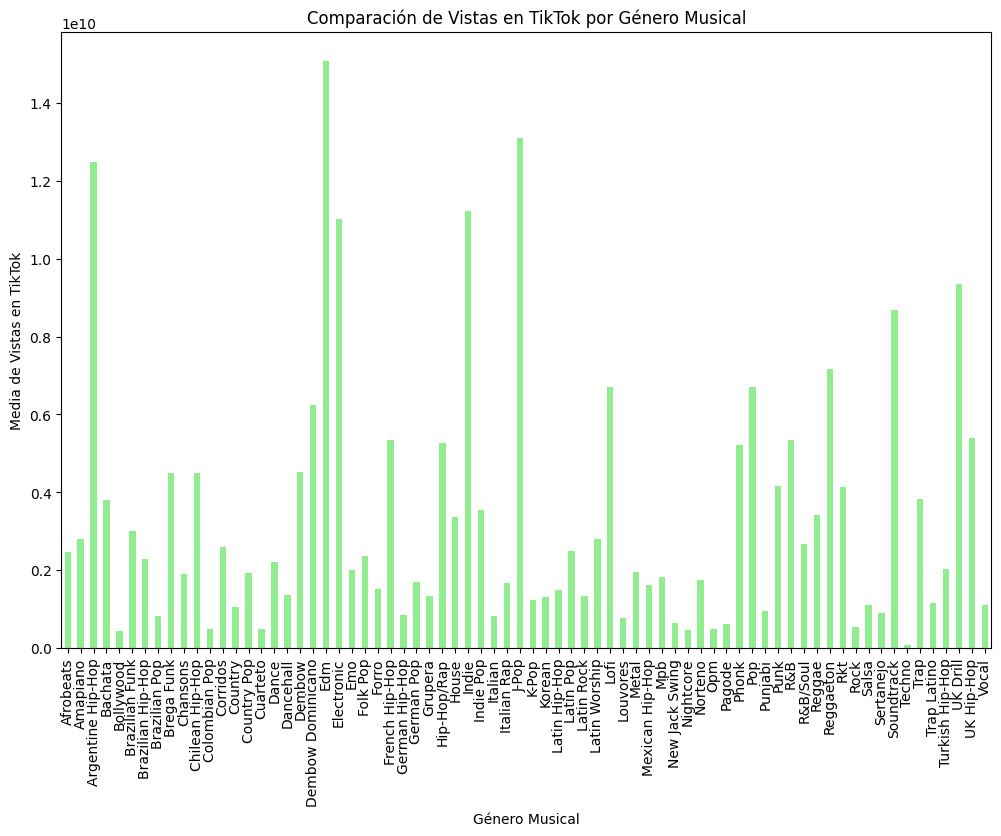

In [ ]:

genre_tiktok = artistas_df_cleaned.groupby('Género 1')[['Seguidores en TikTok', 'Vistas en TikTok', 'Tasa de Participación en TikTok']].mean()


print(genre_tiktok)


plt.figure(figsize=(12, 8))
genre_tiktok['Seguidores en TikTok'].plot(kind='bar', color='skyblue')
plt.title('Comparación de Seguidores en TikTok por Género Musical')
plt.xlabel('Género Musical')
plt.ylabel('Media de Seguidores en TikTok')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 8))
genre_tiktok['Vistas en TikTok'].plot(kind='bar', color='lightgreen')
plt.title('Comparación de Vistas en TikTok por Género Musical')
plt.xlabel('Género Musical')
plt.ylabel('Media de Vistas en TikTok')
plt.xticks(rotation=90)
plt.show()


Género 1
Afrobeats            4.149552e+06
Amapiano             2.795697e+06
Argentine Hip-Hop    1.920259e+07
Bachata              6.688867e+06
Bollywood            6.362585e+06
                         ...     
Trap Latino          2.972854e+07
Turkish Hip-Hop      2.727612e+06
UK Drill             3.410644e+06
UK Hip-Hop           7.909908e+06
Vocal                7.553591e+06
Name: Oyentes mensuales en Spotify, Length: 72, dtype: float64


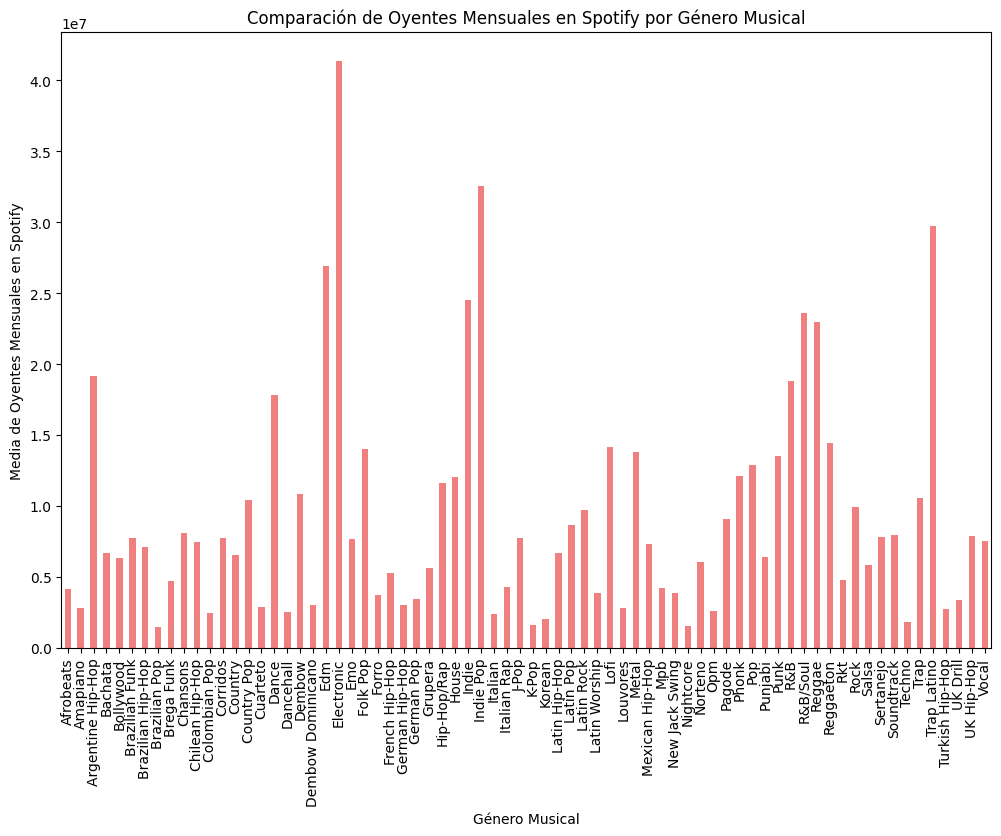

In [ ]:

genre_spotify = artistas_df_cleaned.groupby('Género 1')['Oyentes mensuales en Spotify'].mean()


print(genre_spotify)


plt.figure(figsize=(12, 8))
genre_spotify.plot(kind='bar', color='lightcoral')
plt.title('Comparación de Oyentes Mensuales en Spotify por Género Musical')
plt.xlabel('Género Musical')
plt.ylabel('Media de Oyentes Mensuales en Spotify')
plt.xticks(rotation=90)
plt.show()


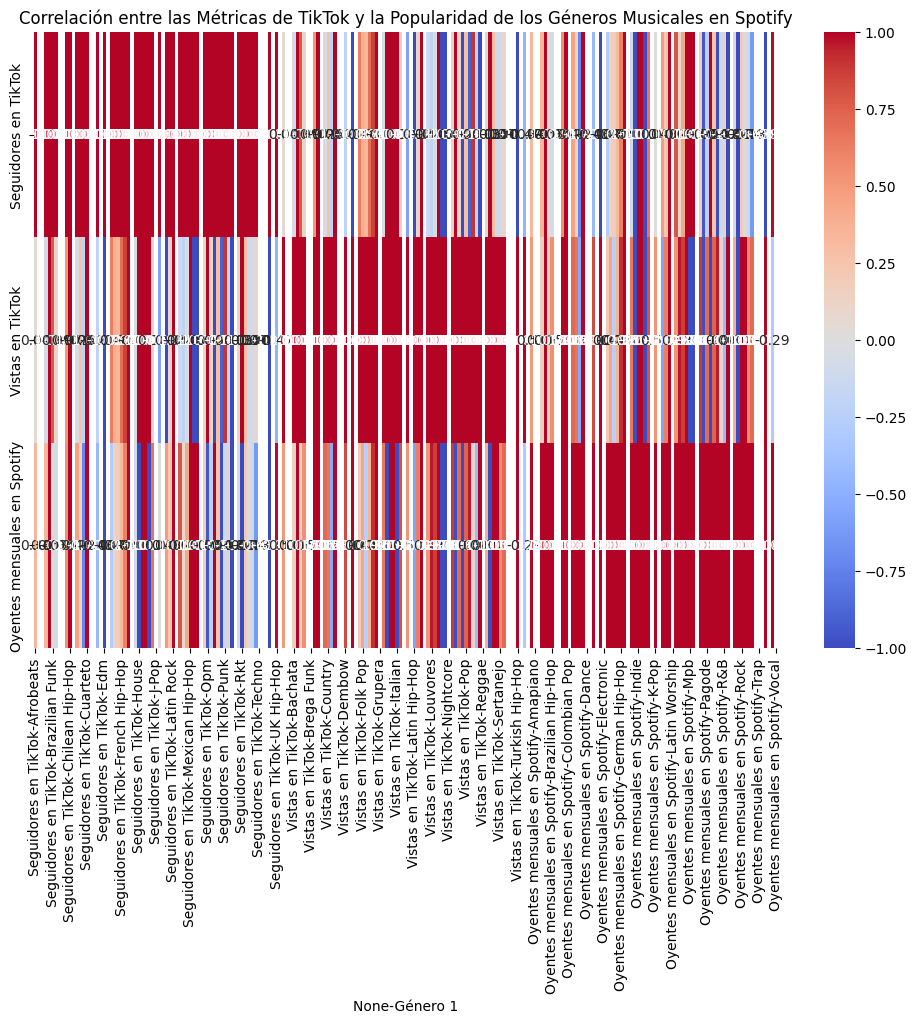

In [ ]:

genre_correlation = artistas_df_cleaned.groupby('Género 1')[['Seguidores en TikTok', 'Vistas en TikTok', 'Oyentes mensuales en Spotify']].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(genre_correlation.unstack(level=0), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre las Métricas de TikTok y la Popularidad de los Géneros Musicales en Spotify')
plt.show()


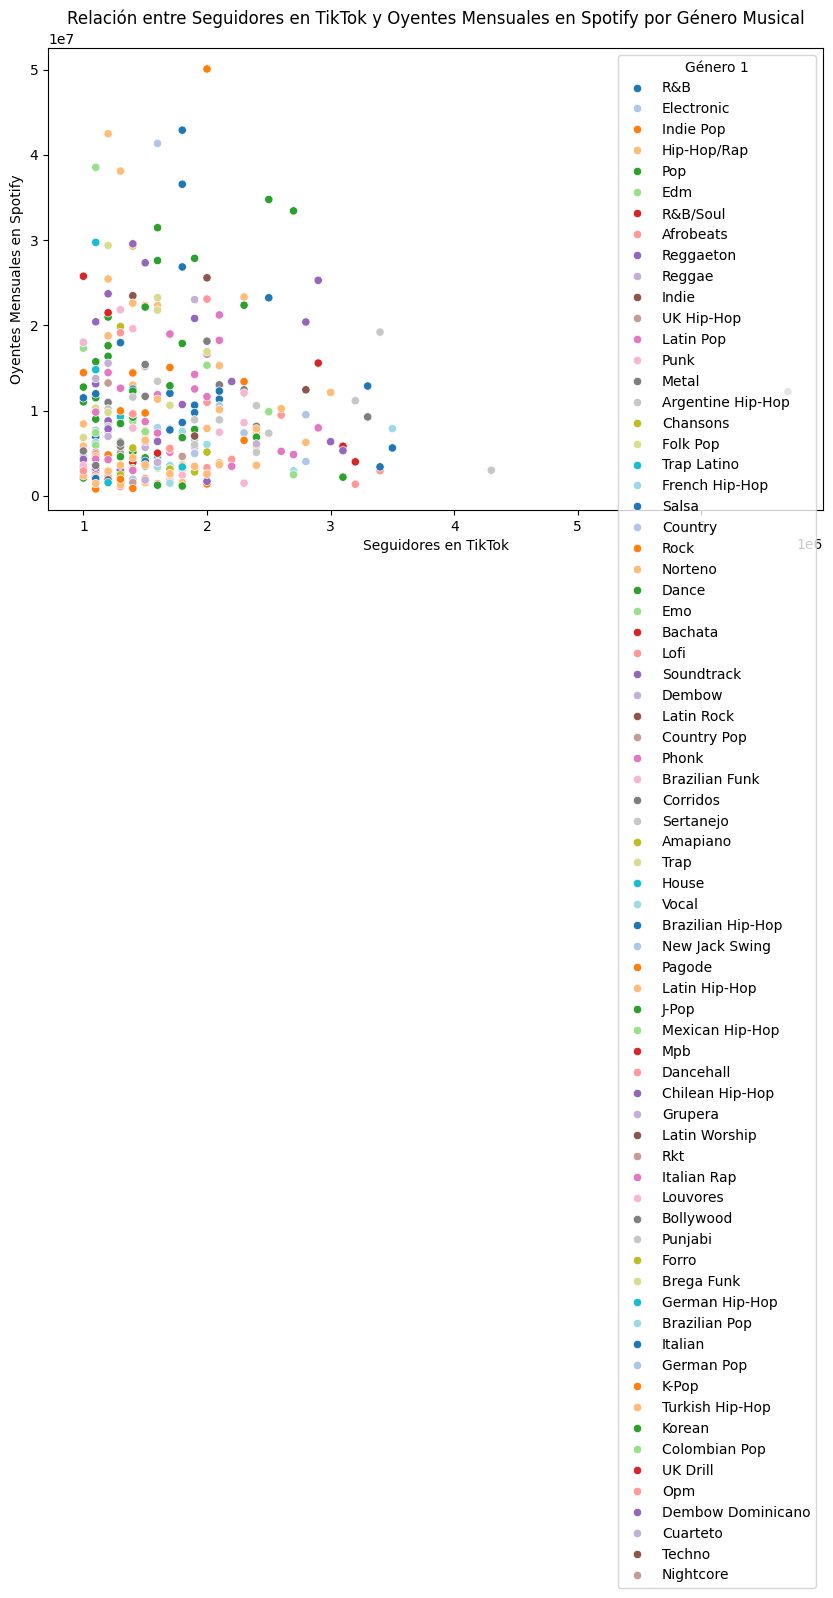

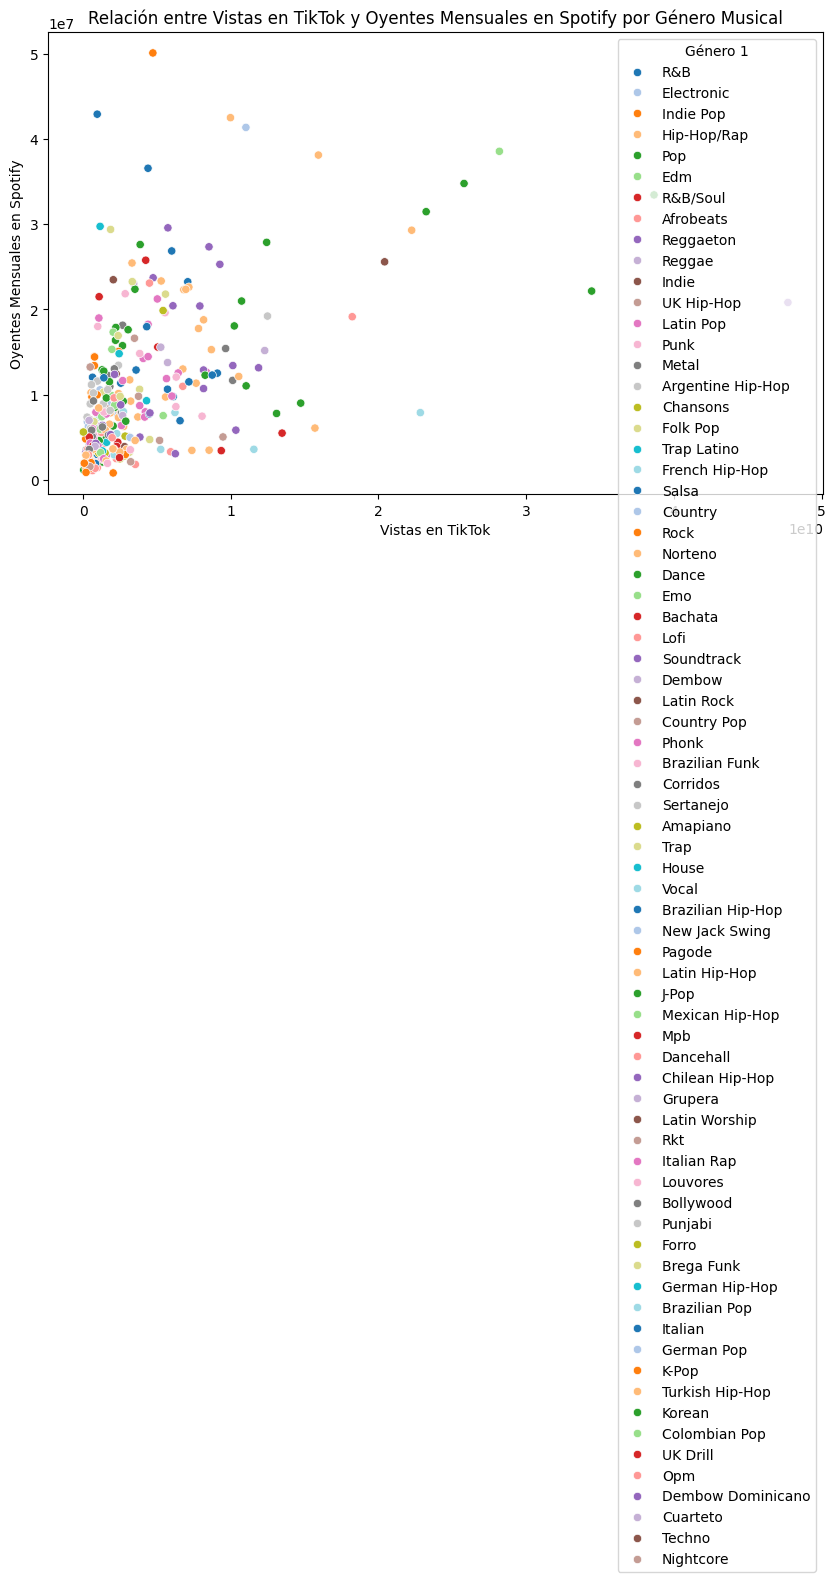

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=artistas_df_cleaned['Seguidores en TikTok'], y=artistas_df_cleaned['Oyentes mensuales en Spotify'], hue=artistas_df_cleaned['Género 1'], palette='tab20')
plt.title('Relación entre Seguidores en TikTok y Oyentes Mensuales en Spotify por Género Musical')
plt.xlabel('Seguidores en TikTok')
plt.ylabel('Oyentes Mensuales en Spotify')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=artistas_df_cleaned['Vistas en TikTok'], y=artistas_df_cleaned['Oyentes mensuales en Spotify'], hue=artistas_df_cleaned['Género 1'], palette='tab20')
plt.title('Relación entre Vistas en TikTok y Oyentes Mensuales en Spotify por Género Musical')
plt.xlabel('Vistas en TikTok')
plt.ylabel('Oyentes Mensuales en Spotify')
plt.show()


In [ ]:

top_genres = artistas_df_cleaned.groupby('Género 1')['Oyentes mensuales en Spotify'].mean()


top_10_genres = top_genres.sort_values(ascending=False).head(10).index


filtered_df = artistas_df_cleaned[artistas_df_cleaned['Género 1'].isin(top_10_genres)]


print(filtered_df['Género 1'].value_counts())


Género 1
R&B                  12
Indie Pop             2
R&B/Soul              2
Edm                   2
Indie                 2
Electronic            1
Reggae                1
Argentine Hip-Hop     1
Trap Latino           1
Dance                 1
Name: count, dtype: int64


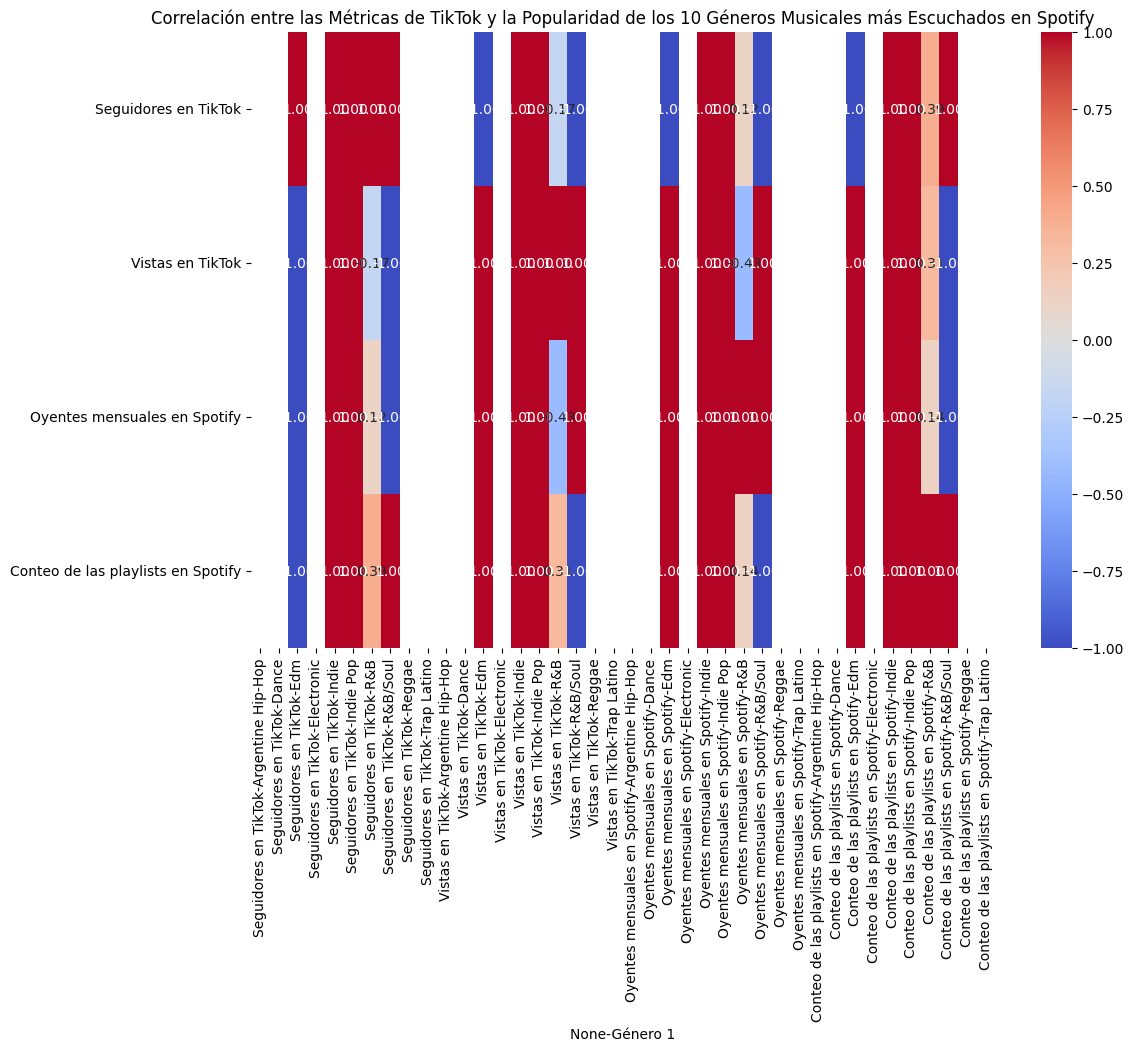

In [ ]:

filtered_genre_correlation = filtered_df.groupby('Género 1')[['Seguidores en TikTok', 'Vistas en TikTok', 'Oyentes mensuales en Spotify', 'Conteo de las playlists en Spotify']].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(filtered_genre_correlation.unstack(level=0), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre las Métricas de TikTok y la Popularidad de los 10 Géneros Musicales más Escuchados en Spotify')
plt.show()


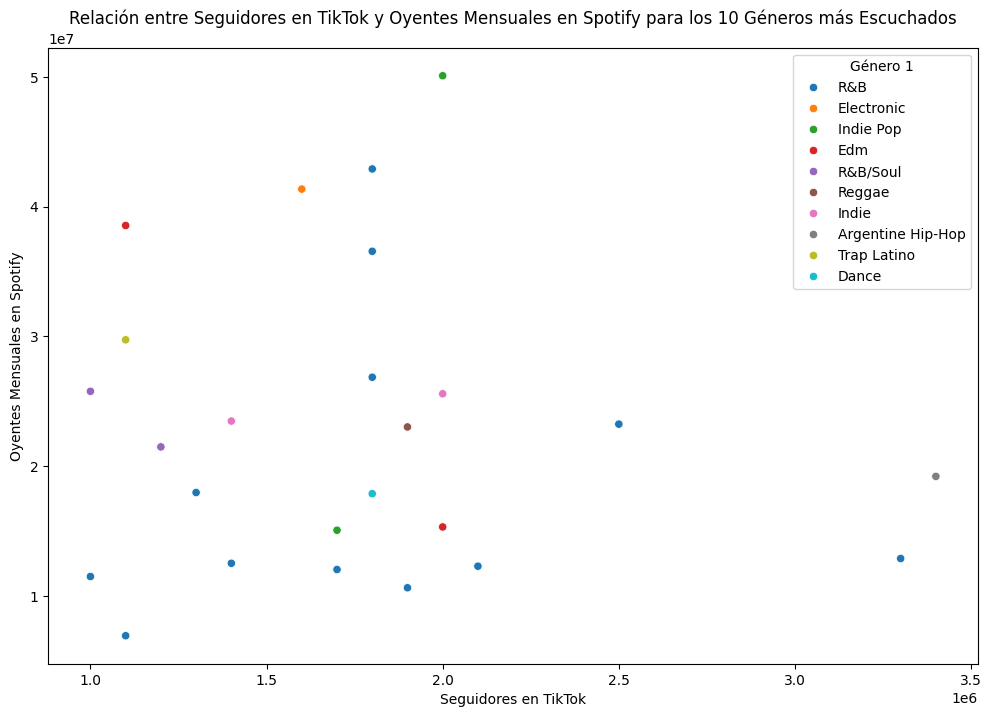

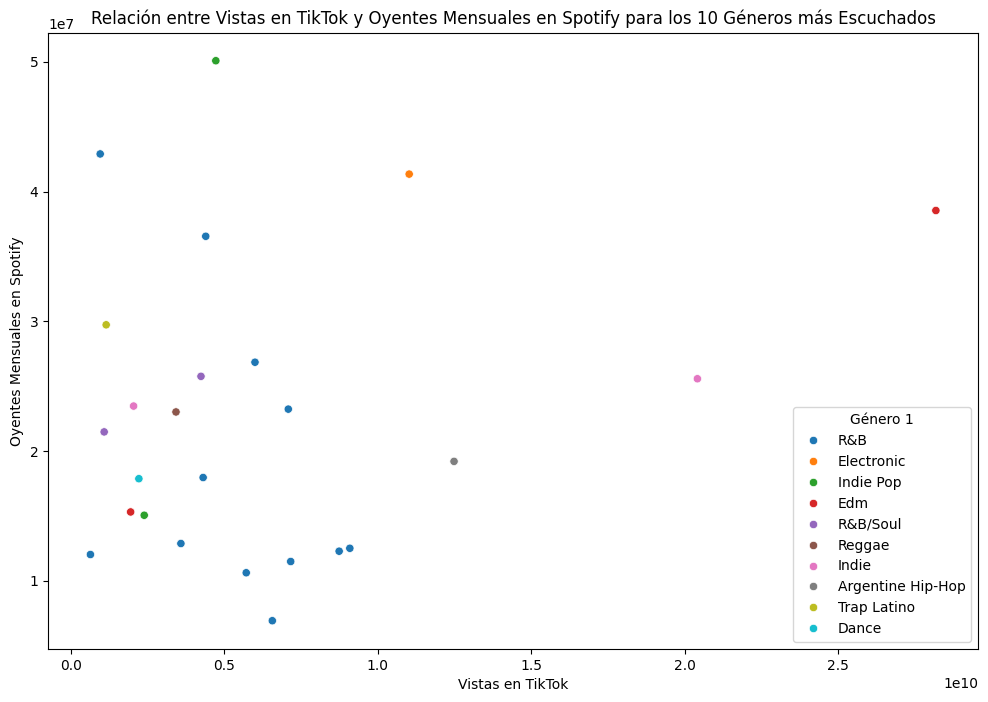

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x=filtered_df['Seguidores en TikTok'], y=filtered_df['Oyentes mensuales en Spotify'], hue=filtered_df['Género 1'], palette='tab10')
plt.title('Relación entre Seguidores en TikTok y Oyentes Mensuales en Spotify para los 10 Géneros más Escuchados')
plt.xlabel('Seguidores en TikTok')
plt.ylabel('Oyentes Mensuales en Spotify')
plt.show()


plt.figure(figsize=(12, 8))
sns.scatterplot(x=filtered_df['Vistas en TikTok'], y=filtered_df['Oyentes mensuales en Spotify'], hue=filtered_df['Género 1'], palette='tab10')
plt.title('Relación entre Vistas en TikTok y Oyentes Mensuales en Spotify para los 10 Géneros más Escuchados')
plt.xlabel('Vistas en TikTok')
plt.ylabel('Oyentes Mensuales en Spotify')
plt.show()


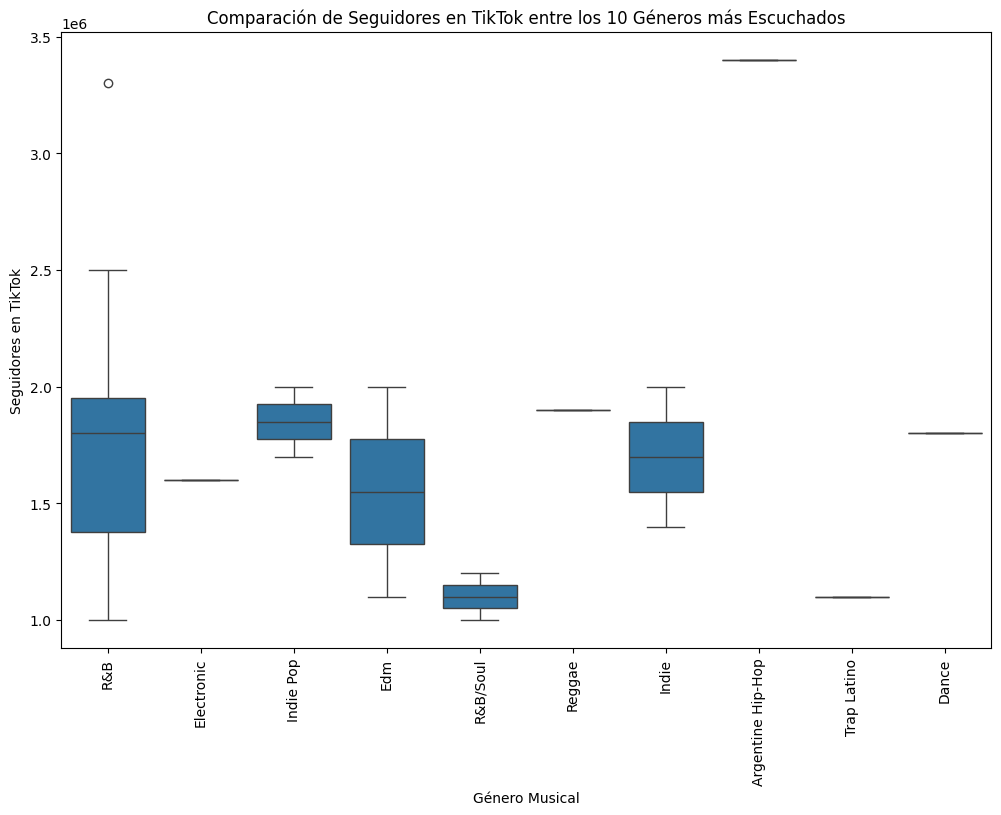

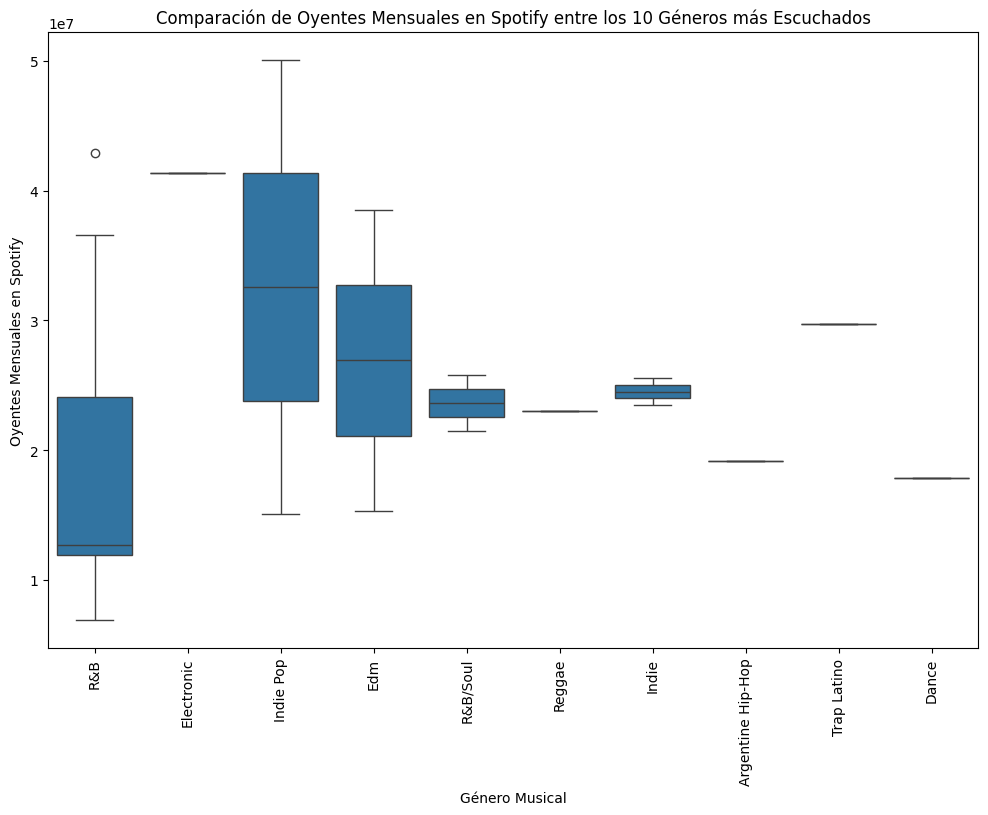

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Género 1', y='Seguidores en TikTok', data=filtered_df)
plt.title('Comparación de Seguidores en TikTok entre los 10 Géneros más Escuchados')
plt.xlabel('Género Musical')
plt.ylabel('Seguidores en TikTok')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(x='Género 1', y='Oyentes mensuales en Spotify', data=filtered_df)
plt.title('Comparación de Oyentes Mensuales en Spotify entre los 10 Géneros más Escuchados')
plt.xlabel('Género Musical')
plt.ylabel('Oyentes Mensuales en Spotify')
plt.xticks(rotation=90)
plt.show()
